# Project Description :

# 1.Data Validation and Cleaning Process
## 1.1 Initial Setup and Data Preparation
The initial step is to create a copy of the raw data and prepare it for further analysis:
 
    # Load the raw data
    raw_df = pd.read_csv("recipe_site_traffic_2212.csv")

    # Create a new DataFrame for manipulation and analysis
    df = raw_df.copy()

    # Check df
    df.head()
        
### Purpose:  
By creating a copy of the raw data `(df = raw_df.copy())`, we ensure that any manipulation or cleaning does not alter the original data, allowing us to revert back or reference it if needed.

### Output:  
After creating a copy, the new DataFrame (df) is ready for data validation and cleaning.
        
![Screenshot 2567-10-08 at 15.31.25](Screenshot%202567-10-08%20at%2015.31.25.png)

## 1.2 Initial Inspection of Data
To understand the dataset, we inspect our dataset to check the data type, the shape of our dataset, and number of the missing values in each column.

### Inspecting the Data:

    df.info()
    
### Purpose:  
This provides a summary of the DataFrame, including the number of non-null entries in each column and the data type of each column.

### Outcome:  
The `info()` output shows that there are missing values in several columns, and the data types of some columns may need conversion.

![Screenshot 2567-10-08 at 15.40.58](Screenshot%202567-10-08%20at%2015.40.58.png)

### Shape of the Data:

    df.shape

### Purpose:  
Shows the number of rows and columns in the dataset.

### Outcome:  
The DataFrame has 18 columns and 200 rows.

![Screenshot 2567-10-08 at 15.46.35](Screenshot%202567-10-08%20at%2015.46.35.png)

### Checking for Missing Values:

    df.isna().sum()
    
### Purpose:  
Identifies the columns with missing values, which will be addressed in subsequent cleaning steps.

### Outcome:  
Columns such as calories, carbohydrate, sugar, protein, and high_traffic contain missing values.

![Screenshot 2567-10-08 at 15.46.45](Screenshot%202567-10-08%20at%2015.46.45.png)

## 1.3 Unique Value Inspection and Data Type Conversion
To understand the structure and ensure consistency, we check the unique values in key columns:

### Check Unique Values:

    df["recipe"].unique()
    df["calories"].unique()
    df["carbohydrate"].unique()
    df["sugar"].unique()
    df["protein"].unique()
    df["category"].unique()
    df["servings"].unique()
    df["high_traffic"].unique()

### Purpose :
Inspect the consistency of data within each column.

### Outcome :
The servings column contained some non-numeric entries, such as "4 as a snack". These need to be replaced and converted to integer values.

![Screenshot 2567-10-08 at 15.51.50](Screenshot%202567-10-08%20at%2015.51.50.png)

### Servings Column Cleaning:

    df["servings"] = df["servings"].str.replace("4 as a snack", "4")
    df["servings"] = df["servings"].str.replace("6 as a snack", "6")
    df["servings"] = df["servings"].astype(int)
    df["servings"].unique()
    
### Purpose :
This ensures that the servings column has consistent numeric values for easier analysis.

### Outcome :
The servings column is now consistency and only contains numeric value

![Screenshot 2567-10-08 at 15.57.43](Screenshot%202567-10-08%20at%2015.57.43.png)

### Handling High Traffic Column:

    df["high_traffic"] = df["high_traffic"].fillna("Not High")
    df["high_traffic"] = df["high_traffic"].map({"High": 1, "Not High": 0})
    df["high_traffic"] = df["high_traffic"].astype(bool)
    df["high_traffic"].value_counts(dropna = False)
    
### Purpose :
Ensures that the high_traffic column is correctly formatted as a boolean value indicating whether a recipe has high traffic or not.

### Outcome :
The missing value in the high_traffic column has been replace with the right formatted and ready for further analysis.

![Screenshot 2567-10-08 at 16.02.35](Screenshot%202567-10-08%20at%2016.02.35.png)

## 1.4 Distribution Analysis and Missing Value Imputation
Before filling missing values, we analyzed the distribution of calories, carbohydrate, sugar, and protein for each category and serving size using the `plot_distribution()` function:

    def plot_distribution(category, servings):
    # Define a list of colors for the plots
    colors = ['skyblue', 'green', 'orange', 'pink']

    # Set up the figure and axes for a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  
    axes = axes.flatten()

    # Create histograms for each nutritional column
    for i, column in enumerate(columns_to_plot):
        sns.histplot(df[(df["category"] == category) & (df["servings"] == servings)], x=column, ax=axes[i], color=colors[i])
        axes[i].set_title(f'Distribution of {column.capitalize()}')

    plt.tight_layout()
    plt.show()

### Purpose :
The `plot_distribution()` function helps visualize the spread of values for each nutritional attribute. This provides insights into the best central tendency (mean, median, or mode) to use for filling missing values.

### Outcome :
Displays a set of histograms showing the distribution of calories, carbohydrate, sugar, and protein for provided category and number of servings.

    plot_distribution("Pork", 6)
    
Display the distribution of Pork with 6 Servings.

![Screenshot 2567-10-08 at 16.25.12](Screenshot%202567-10-08%20at%2016.25.12.png)

## 1.5 Missing Value Imputation
The `fill_missing_values()` function was created to fill the missing values based on the selected central value of the subset data.

    def fill_missing_values(category, servings, method='median'):
    subset = df[(df["category"] == category) & (df["servings"] == servings)]
    columns_to_fill = ["calories", "carbohydrate", "sugar", "protein"]
    central_values = {}

    for column in columns_to_fill:
        if method == 'mean':
            central_value = round(subset[column].mean(), 2)
        elif method == 'median':
            central_value = round(subset[column].median(), 2)
        elif method == 'mode':
            central_value = round(subset[column].mode().iloc[0], 2) if not subset[column].mode().empty else None
        else:
            raise ValueError("Method must be 'mean', 'median', or 'mode'.")
        
        central_values[column] = central_value

    # Fill missing values with the central value
    for column in columns_to_fill:
        df.loc[(df["category"] == category) & (df["servings"] == servings), column] = \
        df.loc[(df["category"] == category) & (df["servings"] == servings), column].fillna(central_values[column])

### Purpose:
This function takes in category and servings parameters and fills missing values using the specified method (median by default).

### Outcome:
The missing values within the category and serving that we provide has been replace with the central values.

    fill_missing_values("Pork", 6)
    
    # Check if the NaN values are filled for Pork
    df[(df["category"] == "Pork") & (df["servings"] == 6)].isna().sum()
    
Imputing the missing value in Pork with 6 Servings.

    
![Screenshot 2567-10-08 at 16.33.22](Screenshot%202567-10-08%20at%2016.33.22.png)

## 1.6 Final Verification
After imputing missing values for each combination of category and servings, we rechecked the DataFrame to ensure that all missing values were filled:

    df.isna().sum()
    
### Purpose:
This confirms that no missing values remain in the DataFrame.

### Outcome:
All columns have zero missing values, indicating successful data cleaning.

![Screenshot 2567-10-08 at 17.36.48](Screenshot%202567-10-08%20at%2017.36.48.png)

# 2. Exploratory Data Analysis
The exploratory analysis for the recipe dataset includes single-variable and multi-variable visualizations to better understand the characteristics of the data and identify relationships between features. The findings are based on the following visualizations:

## 2.1 Number of High-Traffic Recipes per Category
The first visualization shows the number of high-traffic recipes for each category. This bar chart allows us to identify which categories have the highest number of high-traffic recipes.
    
    high_traffic_df = df[df["high_traffic"] == True]
    high_traffic_df.head()
    
    # Group the data by 'category' and count the occurrences
    high_category_counts = high_traffic_df['category'].value_counts().reset_index()
    high_category_counts.columns = ['category', 'count']

    # Create a bar plot with the correct counts and custom colors
    fig = px.bar(high_category_counts, y='category', x='count', color='category', 
                 title="Number of High-Traffic Recipe per Category", 
                 orientation='h')

    fig.update_layout(    
        width=1200,  # Set the width of the figure in pixels
        height=600 )  # Set the height of the figure in pixels

    # Show the plot
    fig.show()

![Number_Of_High_Traffic](Number_Of_High_Traffic.png)

### Key Insights:
- The "Potato" category has the highest number of high-traffic recipes, with a total of 83 recipes.
- The "Vegetable" category follows closely with 82 high-traffic recipes.
- "Pork" ranks third with 77 high-traffic recipes.
- Categories like "Meat" (59 recipes) and "Lunch/Snacks" (57 recipes) show moderate numbers of high-traffic recipes.
- "Dessert" (53 recipes) and "One Dish Meal" (52 recipes) also have a fair share of high-traffic recipes.
- The "Chicken Breast" category has 46 high-traffic recipes, making it less prominent compared to the top categories.
- "Breakfast" has 33 high-traffic recipes, and "Chicken" has only 27 high-traffic recipes.
- The "Beverages" category has the lowest number of high-traffic recipes, with only 5 recipes.

## 2.2 Proportion of High and Low Traffic Recipes per Category
The second visualization is a stacked bar chart that shows the proportion of high- and low-traffic recipes within each category. This chart is useful for comparing the relative popularity of recipes within each category.

    # Calculate high and low traffic proportions for each category
    traffic_proportions = []

    # Get unique categories
    categories = df["category"].unique()

    for cat in categories:
        # Count high and low traffic for the given category
        high_traffic_count = df[(df["category"] == cat) & (df["high_traffic"] == True)].shape[0]
        low_traffic_count = df[(df["category"] == cat) & (df["high_traffic"] == False)].shape[0]
        total = high_traffic_count + low_traffic_count

        if total > 0:
            high_proportion = round((high_traffic_count / total) * 100, 2)
            low_proportion = round((low_traffic_count / total) * 100, 2)
        else:
            high_proportion = 0
            low_proportion = 0

        # Append proportions to the list
        traffic_proportions.append([cat, high_proportion, low_proportion])

    # Create a DataFrame for plotting
    traffic_proportions_df = pd.DataFrame(traffic_proportions, columns=['Category', 'High Traffic Proportion (%)', 'Low Traffic Proportion (%)'])

    # Sort the DataFrame by high traffic proportion
    traffic_proportions_df = traffic_proportions_df.sort_values(by="High Traffic Proportion (%)", ascending=False)

    traffic_proportions_df
    
    # Create a Plotly figure for the stacked bar chart
    fig = go.Figure()

    # Add the high traffic proportion bars
    fig.add_trace(go.Bar(
        x=traffic_proportions_df['Category'],
        y=traffic_proportions_df['High Traffic Proportion (%)'],
        name='High Traffic Proportion (%)',
        marker_color='skyblue',
        marker_line_color='black',  # Border color
        marker_line_width=1       # Border width
    ))

    # Add the low traffic proportion bars
    fig.add_trace(go.Bar(
        x=traffic_proportions_df['Category'],
        y=traffic_proportions_df['Low Traffic Proportion (%)'],
        name='Low Traffic Proportion (%)',
        marker_color='lightcoral',
        marker_line_color='black',  # Border color
        marker_line_width=1       # Border width
    ))

    # Update layout to create a stacked bar chart
    fig.update_layout(
        barmode='stack',  # Stack the bars
        title='Proportion of High and Low Traffic Recipe per Category',
        xaxis_title='Category',
        yaxis_title='Proportion (%)',
        xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
        legend=dict(
            title='Traffic Type',
            x=1.02,  # Position the legend outside the plot
            y=1
        ),
        plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
        margin=dict(l=70, r=70, t=80, b=80),  # Adjust margins for better spacing
        width=1200,  # Set the width of the figure in pixels
        height=600   # Set the height of the figure in pixels
    )

    # Show the plot
    fig.show()
    
![Proportion_Of_High_and_Low_Traffic](Proportion_Of_High_and_Low_Traffic.png)

### Key Insights:
- "Vegetable" has the highest proportion of high-traffic recipes, with 98.8% of recipes considered high-traffic and only 1.2% classified as low-traffic. This suggests that almost all recipes in the "Vegetable" category perform well in terms of attracting visitors.
- "Potato" is also a strong category, with 94.32% high-traffic recipes and only 5.68% low-traffic, indicating that potato-based recipes are highly popular and engaging.
- The "Pork" category follows closely, with 91.67% of recipes classified as high-traffic and 8.33% as low-traffic.
- "Meat" (74.68% high-traffic and 25.32% low-traffic) and "One Dish Meal" (73.24% high-traffic and 26.76% low-traffic) show moderate performance, with more than 70% of their recipes classified as high-traffic.
- Categories such as "Lunch/Snacks" (64.04% high-traffic and 35.96% low-traffic) and "Dessert" (63.86% high-traffic and 36.14% low-traffic) have a lower proportion of high-traffic recipes compared to the top categories but still show a majority of high-traffic content.
- The "Chicken Breast" category has a nearly balanced proportion, with 46.94% high-traffic recipes and 53.06% low-traffic recipes, indicating that only about half of the recipes in this category perform well.
- "Chicken" and "Breakfast" have a relatively low proportion of high-traffic recipes, with 36.49% and 31.13% high-traffic respectively, and a majority classified as low-traffic.
- "Beverages" stands out as the lowest-performing category, with only 5.43% of recipes considered high-traffic and 94.57% classified as low-traffic, indicating very low popularity or visibility for recipes in this category.

## 2.3 Correlation Analysis Between Variables
The correlation heatmap displays the relationships between the various variables in the dataset, helping us understand the strength and direction of the relationships between different features, including the high_traffic variable.

    corr = df.corr().round(2)

    mask = np.triu(np.ones_like(corr, dtype= bool), k= 1)

    plt.figure(figsize=(20,10))
    sns.heatmap(corr, annot= True, cmap="YlGnBu", mask= mask)
    plt.show()
    
![correlation](correlation.png)

### Key Insights:

- The highest positive correlations with high_traffic are observed for Vegetable (0.24), Potato (0.22), and Pork (0.20). This indicates that recipes in these categories are more likely to be high-traffic.
- Categories like Meat (0.09) and One Dish Meal (0.07) show slight positive correlations with high_traffic.
- Conversely, categories such as Chicken (-0.14) and Breakfast (-0.21) have negative correlations with high_traffic, indicating that recipes in these categories are less likely to be high-traffic.
- Nutritional values such as calories, carbohydrate, sugar, and protein have weak correlations with high_traffic, indicating that the nutritional content of recipes may not be a primary factor in driving traffic.

## 2.4 Summary of Exploratory Analysis
- High-Traffic Categories:
The categories Potato, Vegetable, and Pork consistently attract high traffic. These categories show both high counts of high-traffic recipes and strong positive correlations with the high_traffic variable. This indicates that they are well-received by the audience and should be further emphasized in recipe content strategies.
- Low-Traffic Categories:
Categories such as Chicken, Breakfast, and Beverages have lower proportions of high-traffic recipes and weaker correlations with high_traffic. These categories may benefit from targeted optimization, such as improving recipe titles, images, or SEO strategies, to attract more traffic.
- Impact of Nutritional Values:
Nutritional values like calories and protein have weak correlations with high_traffic, suggesting that other factors (e.g., presentation, recipe complexity) are more influential in determining recipe traffic.

# 3. Model Development
The goal of this analysis is to develop machine learning models to classify whether a recipe falls into the high-traffic category based on various features. We applied three different classification models: Logistic Regression, Random Forest Classifier, and K-Nearest Neighbors (KNN). After training and tuning each model, we used a custom function, get_model_performance(), to evaluate each model's performance over multiple iterations. This function helped us ensure that our results were stable and not influenced by random variations in the data.

By comparing the results obtained from our custom function, we were able to perform a comprehensive comparison of the three models to identify the best-performing model for our specific task and dataset. This process allows us to select the most suitable model for predicting high-traffic recipes with a high degree of confidence. The chosen model will then be use to compare with baseline model in the subsequent evaluation section.

Below is a summary of the results, performance of each model, and the custom function used to evaluate these models.

## 3.1 Model Selection and Setup
### Model 1 : Logistic Regression
Logistic Regression was chosen due to its simplicity and ability to provide interpretable results for binary classification problems. By comparing Logistic Regression with more complex models like Random Forest and KNN, we can evaluate its effectiveness and determine whether its simplicity is sufficient for this classification task. The model was tuned using RandomizedSearchCV to find the best hyperparameters, including C, penalty, solver, and max_iter.

    # Model 1 : Logistic Regression

    # Set up the Logistic Regression
    logreg = LogisticRegression()

    # Indicate the searching area for tuning the model
    param_grid = {
        'C': np.arange(0.001, 100, 0.01),
        'penalty': ['l1', 'l2'],  # Use 'saga' solver to support L1
        'solver': ['liblinear', 'saga'],  # Solver compatible with 'l1' penalty
        'max_iter': np.arange(100, 1000, 100)
    }

    # Set up RandomizedSearchCV for tuning the model
    logreg_search = RandomizedSearchCV(
                                        estimator = logreg,
                                        param_distributions = param_grid,
                                        cv = kf,
                                        verbose = 1,
                                        random_state = 100,
                                        n_iter = 1000
    )

    # Tuning the model 
    logreg_search.fit(X_train, y_train)

    # Best parameters and best score
    print(f"Best Parameters: {logreg_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {logreg_search.best_score_:.2f}")
    
    # Get best model
    best_model_1 = logreg_search.best_estimator_
    best_model_1
    
![Screenshot 2567-10-09 at 16.20.45](Screenshot%202567-10-09%20at%2016.20.45.png)
    
After the tuning process, the best configuration for the Logistic Regression model was found to have the following hyperparameters:
- Regularization Strength (C): 0.21099999999999997
- Solver: liblinear
- Penalty: l2 (Ridge regularization)
- Maximum Iterations (max_iter): 700

### Model 2 : Random Forest Classifier
The Random Forest model was selected due to its ability to handle complex interactions between features, robustness, and lower risk of overfitting through the ensemble of decision trees. It is particularly effective for classification tasks where relationships between features might not be linear. The model was tuned using RandomizedSearchCV with the following hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, and bootstrap.

    # Model 2 : Random Forest Classifier

    # Set up the Random Forest Classifier
    rfc = RandomForestClassifier()

    # Indicate the searching area for tuning the model
    params = {
        "n_estimators" : np.arange(50, 1000, 50),
        "max_depth" : np.arange(10, 150, 10),
        "min_samples_split" : np.arange(0.1, 1, 0.05),
        "min_samples_leaf" : [1, 2, 3, 4, 5],
        "max_features" : ["sqrt", "log2"],
        "bootstrap" : [True, False]
    }

    # Set up RandomizedSearchCV for tuning the model
    random_search = RandomizedSearchCV(
                                        estimator= rfc,
                                        param_distributions= params,
                                        cv = kf,
                                        verbose= 1,
                                        random_state= 100,
                                        n_iter= 1000
    )

    # Tuning the model
    random_search.fit(X_train, y_train)

    # Best parameters and best score
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")
    
    # Get best model
    best_model_2 = random_search.best_estimator_
    best_model_2
    
![Screenshot 2567-10-09 at 17.00.17](Screenshot%202567-10-09%20at%2017.00.17.png)

After the tuning process, the best configuration for the Random Forest model was found to have the following hyperparameters:
- Number of Trees (n_estimators): 600
- Maximum Depth (max_depth): 10
- Minimum Samples Split (min_samples_split): 0.1
- Minimum Samples per Leaf (min_samples_leaf): 1
- Maximum Features (max_features): sqrt
- Bootstrap Sampling (bootstrap): False

### Model 3 : K-Nearest Neighbors (KNN)
KNN was chosen as another competitor model due to its non-parametric nature and ability to classify data points based on proximity. This model is particularly useful for understanding the influence of proximity-based patterns in the data. The hyperparameter n_neighbors (number of neighbors to consider) was tuned using RandomizedSearchCV to identify the optimal value for classification.

    # Model 3 : K-Nearest Neighbors

    # Set up the K-Neareast Neighbor
    knn = KNeighborsClassifier()

    # Indicate the searching area for tuning the model
    knn_params = {"n_neighbors" : np.arange(1, 100, 5)}

    # Set up RandomizedSearchCV for tuning the model
    grid_cv = RandomizedSearchCV(
                                estimator = knn,
                                param_distributions = knn_params,
                                verbose = 1,
                                cv = kf,
                                random_state = 100,
                                n_iter= 1000
    )

    # Tuning the model
    grid_cv.fit(X_train, y_train)

    # Best parameters and best score
    print(f"Best Parameters: {grid_cv.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_cv.best_score_:.2f}")
    
    # Get best model
    best_model_3 = grid_cv.best_estimator_
    best_model_3
    
![Screenshot 2567-10-09 at 17.00.28](Screenshot%202567-10-09%20at%2017.00.28.png)

After the tuning process, the best configuration for the K-Nearest Neighbors model was found to have the following hyperparameter:
- Number of Neighbors (n_neighbors): 26

## 3.2 Evaluating Model Performance with get_model_performance() 
Once the best configurations for each model were identified, we used the custom function `get_model_performance()` to evaluate the performance of these three models over multiple runs. This function enabled us to obtain the average confusion matrix, classification report, mean accuracy, and mean recall across 100 iterations for each model.

By using `get_model_performance()`, we ensured that our results were not influenced by random variations in the data and that each model was consistently evaluated under the same conditions. This approach allowed us to fairly compare the performance of the three models and identify the best-performing one for our classification task.

### Model 1 (Logistic Regression)'s Performance :

    model1_average_confusion_matrix, model1_avg_classification_report, model1_avg_accuracy_score, model1_avg_recall_score = get_model_performance(X, y, best_model_1, n_runs=100, bootstrap=True)
    
- Mean Accuracy : 0.76
- Mean Recall : 0.82
- Mean Confusion Matrix :
    - TN : 75
    - FP : 38
    - FN : 31
    - TP : 141
- Classification Report :
    - True Class
        - Precision : 0.79
        - Recall : 0.82
        - F1-Score : 0.80
    - False Class
        - Precision : 0.71
        - Recall : 0.66
        - F1-Score : 0.68

### Model 2 (Random Forest Classifier)'s Performance :

    model2_average_confusion_matrix, model2_avg_classification_report, model2_avg_accuracy_score, model2_avg_recall_score = get_model_performance(X, y, best_model_2, n_runs=100, bootstrap=True)
    
- Mean Accuracy : 0.77
- Mean Recall : 0.86
- Mean Confusion Matrix :
    - TN : 73
    - FP : 41
    - FN : 25
    - TP : 146
- Classification Report :
    - True Class
        - Precision : 0.78
        - Recall : 0.85
        - F1-Score : 0.82
    - False Class
        - Precision : 0.75
        - Recall : 0.64
        - F1-Score : 0.69

### Model 3 (K-Nearest Neighbors)'s Performance :

    model3_average_confusion_matrix, model3_avg_classification_report, model3_avg_accuracy_score, model3_avg_recall_score = get_model_performance(X, y, best_model_3, n_runs=100, bootstrap=True)
    
- Mean Accuracy : 0.75
- Mean Recall : 0.81
- Mean Confusion Matrix :
    - TN : 75
    - FP : 37
    - FN : 33
    - TP : 140
- Classification Report :
    - True Class
        - Precision : 0.79
        - Recall : 0.81
        - F1-Score : 0.80
    - False Class
        - Precision : 0.70
        - Recall : 0.67
        - F1-Score : 0.68

## 3.3 Model Comparison and Model Selected
From the results of get_model_performance(), it is evident that the Random Forest Classifier (Model 2) achieved the highest mean accuracy (0.77) and mean recall (0.85) among the three models. This indicates that the Random Forest model is the most effective in identifying high-traffic recipes, while maintaining a balance between correctly classifying both true and false classes.

Based on these findings, we recommend using the Random Forest Classifier (Model 2) as the final model for this classification task. It will serve as the primary benchmark for further evaluations and comparisons.

# 4. Model Evaluation
In this section, we compare the performance of the selected best model, which is the Random Forest Classifier, against a baseline Logistic Regression model. The comparison aims to evaluate how well the tuned model performs relative to the baseline and determine if it meets the desired performance goal of predicting high-traffic recipes 80% of the time.

## 4.1 Baseline Model
The Logistic Regression model was used as the baseline due to its simplicity and ability to provide interpretable results. While it is not expected to perform as well as more complex models, it serves as a reference point to understand how much improvement the Random Forest model can offer.

    baseline_model = LogisticRegression()  # Baseline model (Logistic Regression)
    
## 4.2 Comparison Model
The Random Forest Classifier, identified as the best model in the previous sections, was selected as the tuned model for comparison. The objective is to determine if the Random Forest model significantly outperforms the baseline model and achieves the desired level of recall.

    tuned_model = best_model_2  # Model 2 (Tuned model)
    
## 4.3 Model Comparison
The custom function compare_models() was used to evaluate the performance of both the baseline and the tuned models over multiple runs (e.g., 100 iterations). This function generates the average confusion matrix, classification report, mean accuracy, and mean recall for each model, ensuring a fair and comprehensive comparison.

    def compare_models(X, y, baseline_model, tuned_model, n_runs=100, bootstrap=True):
    # Initialize variables to accumulate results for both models
    recall_scores_baseline = []
    accuracy_scores_baseline = []
    confusion_matrices_baseline = []
    classification_reports_baseline = []

    recall_scores_tuned = []
    accuracy_scores_tuned = []
    confusion_matrices_tuned = []
    classification_reports_tuned = []

    for i in range(n_runs):
        # Optional: Bootstrap sampling (resample with replacement)
        if bootstrap:
            X_resampled, y_resampled = resample(X, y)
        else:
            X_resampled, y_resampled = X, y

        # Scaling the data
        scaler = StandardScaler()
        X_resampled_scaled = scaler.fit_transform(X_resampled)

        # Use a different random_state for each iteration
        random_seed = np.random.randint(0, 10000)  # Random seed for each split

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=random_seed)

        # Train Baseline Model
        baseline_model.fit(X_train, y_train)
        y_pred_baseline = baseline_model.predict(X_test)

        # Get the recall and accuracy score of the baseline model
        recall_baseline = recall_score(y_test, y_pred_baseline)
        accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

        # Add the recall and accuracy score of the baseline model to the list
        recall_scores_baseline.append(recall_baseline)
        accuracy_scores_baseline.append(accuracy_baseline)

        # Store confusion matrix and classification report for baseline model
        conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
        confusion_matrices_baseline.append(conf_matrix_baseline)

        class_report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)
        classification_reports_baseline.append(class_report_baseline)

        # Train Tuned Model
        tuned_model.fit(X_train, y_train)
        y_pred_tuned = tuned_model.predict(X_test)

        # Get the recall and accuracy score of the tuned model
        recall_tuned = recall_score(y_test, y_pred_tuned)
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

        # Add the recall and accuracy score of the tuned model to the list
        recall_scores_tuned.append(recall_tuned)
        accuracy_scores_tuned.append(accuracy_tuned)

        # Store confusion matrix and classification report for tuned model
        conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
        confusion_matrices_tuned.append(conf_matrix_tuned)

        class_report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)
        classification_reports_tuned.append(class_report_tuned)

    # Calculate mean recall and accuracy scores
    mean_recall_baseline = np.round(np.mean(recall_scores_baseline), 2)
    mean_recall_tuned = np.round(np.mean(recall_scores_tuned), 2)
    
    mean_accuracy_baseline = np.round(np.mean(accuracy_scores_baseline), 2)
    mean_accuracy_tuned = np.round(np.mean(accuracy_scores_tuned), 2)

    # Calculate average confusion matrices
    avg_confusion_matrix_baseline = np.round(np.mean(confusion_matrices_baseline, axis=0))
    avg_confusion_matrix_tuned = np.round(np.mean(confusion_matrices_tuned, axis=0))

    # Calculate average classification reports
    def calculate_avg_classification_report(classification_reports):
        avg_classification_report = {}
        for key in classification_reports[0].keys():
            if isinstance(classification_reports[0][key], dict):
                avg_classification_report[key] = {
                    metric: np.round(np.mean([report[key][metric] for report in classification_reports]), 2)
                    for metric in classification_reports[0][key].keys()
                }
            else:
                avg_classification_report[key] = np.round(np.mean([report[key] for report in classification_reports]), 2)
        return avg_classification_report

    avg_classification_report_baseline = calculate_avg_classification_report(classification_reports_baseline)
    avg_classification_report_tuned = calculate_avg_classification_report(classification_reports_tuned)

    # Perform one-tailed t-test (check if tuned model's recall is greater than baseline model's recall)
    t_stat, p_value = stats.ttest_rel(recall_scores_tuned, recall_scores_baseline)
    one_tailed_p_value = p_value / 2

    # Display the results
    print(f"\nBaseline Model Mean Recall: {mean_recall_baseline:.2f}")
    print(f"Tuned Model Mean Recall: {mean_recall_tuned:.2f}", "\n")
    print(f"Baseline Model Mean Accuracy: {mean_accuracy_baseline:.2f}")
    print(f"Tuned Model Mean Accuracy: {mean_accuracy_tuned:.2f}")

    print("\nAverage Confusion Matrix (Baseline Model):")
    print(avg_confusion_matrix_baseline)
    print("\nAverage Confusion Matrix (Tuned Model):")
    print(avg_confusion_matrix_tuned)

    print(f"\nAverage Classification Report (Baseline Model) over {n_runs} runs:")
    for label, metrics in avg_classification_report_baseline.items():
        print(f"{label}:")
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.2f}")
        else:
            print(f"  {metrics:.2f}")

    print(f"\nAverage Classification Report (Tuned Model) over {n_runs} runs:")
    for label, metrics in avg_classification_report_tuned.items():
        print(f"{label}:")
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.2f}")
        else:
            print(f"  {metrics:.2f}")

    print("\nT-statistic:", t_stat)
    print("P-value (one-tailed):", one_tailed_p_value)

    if t_stat > 0 and one_tailed_p_value < 0.10:
        print("Tuned model significantly outperforms the baseline model (one-tailed test).")
    else:
        print("No significant improvement in the tuned model over the baseline model (one-tailed test).")

    # Return the recall scores and average metrics for further analysis
    return {
        "recall_scores_baseline": recall_scores_baseline,
        "recall_scores_tuned": recall_scores_tuned,
        "avg_confusion_matrix_baseline": avg_confusion_matrix_baseline,
        "avg_confusion_matrix_tuned": avg_confusion_matrix_tuned,
        "avg_classification_report_baseline": avg_classification_report_baseline,
        "avg_classification_report_tuned": avg_classification_report_tuned,
        "mean_recall_baseline": mean_recall_baseline,
        "mean_recall_tuned": mean_recall_tuned,
        "mean_accuracy_baseline": mean_accuracy_baseline,
        "mean_accuracy_tuned": mean_accuracy_tuned,
    }
    
### Baseline Model's Performance (Logistic Regression) :
- Baseline Model Mean Accuracy : 0.76
- Baseline Model Mean Recall : 0.82
- Baseline Model Mean Confusion Matrix :
    - TN : 74
    - FP : 39
    - FN : 30
    - TP : 142
- Baseline Model Mean Classification Report :
    - True Class :
        - Precision : 0.79
        - Recall : 0.82
        - F1-Score : 0.80 
    - False Class :
        - Precision : 0.71
        - Recall : 0.66
        - F1-Score : 0.68 

### Comparison Model's Performance (Random Forest Classifier) :
- Comparison Model Mean : 0.77
- Comparison Model Recall : 0.86
- Comparison Model Mean Confusion Matrix :
    - TN : 72
    - FP : 40
    - FN : 25
    - TP : 148 
- Comparison Model Mean Classification Report :
    - True Class :
        - Precision : 0.79
        - Recall : 0.86
        - F1-Score : 0.82
    - False Class :
        - Precision : 0.75
        - Recall : 0.64
        - F1-Score : 0.69
## 4.4 Evaluation Based on Desired Recall
The objective of this classification task is to predict high-traffic recipes with at least 80% recall. Recall was selected as the primary evaluation metric because recall measures the ability of the model to correctly identify all true positive cases (in this context, correctly classifying high-traffic recipes). Using recall as the primary metric ensures that the model effectively captures as many high-traffic recipes as possible, minimizing the number of missed high-traffic cases.

Therefore, optimizing for recall is critical for this task, as it helps ensure that most high-traffic recipes are accurately detected by the model.

### The results show that:
- The baseline model achieved a mean recall of 0.82, which meets the required performance threshold.
- The comparison model (Random Forest Classifier) achieved a mean recall of 0.86, indicating that it performs even better than the baseline in correctly identifying high-traffic recipes.

## 4.5 Statistical Test for Comparison
To statistically verify if the improvement in recall from the baseline to the tuned model is significant, a one-tailed paired t-test was conducted. The test checks if the recall scores of the tuned model are significantly higher than those of the baseline model. The results were as follows:
- T-Statistic : 33.463521703337065
- P-Value (One-Tailed) : 1.378430595815466e-165

Since the t-statistic is positive and the p-value is significantly less than 0.10, we can conclude that the tuned model (Random Forest Classifier) significantly outperforms the baseline Logistic Regression model in terms of recall. This result confirms that the tuned model is more effective at correctly identifying high-traffic recipes compared to the baseline model.

# 5. Business Metrics
The business metrics selected for this project aim to track the success of identifying and promoting high-traffic recipes. By leveraging the insights from the data and the predictive model, we can define several key metrics that provide a holistic view of the business’s performance in achieving its goals. These metrics can be used to set performance benchmarks, monitor progress, and guide decision-making.

Based on the available data and focus, the business metrics include the Proportion of High-Traffic Recipes, Nutritional Content Analysis of High-Traffic Recipes, Category Contribution to High-Traffic Recipes And  Model Performance Metrics.

## 5.1 Proportion of High-Traffic Recipes
This metric measures the ratio of high-traffic recipes to the total number of recipes on the platform. It provides a direct indicator of how well the business is promoting high-traffic recipes and the overall impact of the model.

### Why Monitor this metric :
This metric is crucial for understanding the effectiveness of the model and business strategy in increasing the visibility of high-traffic recipes. A higher proportion indicates better alignment with user preferences and improved engagement.

### Inital Value Calculation : 
The initial proportion of high-traffic recipes is calculated using the high_traffic column in the dataset.

    benchmark_proportion_high_traffic = df["high_traffic"].value_counts(normalize=True)[0]

    print(f"Benchmark Proportion of High-Traffic Recipes : {benchmark_proportion_high_traffic:.2f}")

### Initial Value :  
The initial value is calculated to be 0.61, it indicates that 61% of all recipes are currently classified as high-traffic

### Monitoring Goal :
The business can monitor and track the performance of the website. They can set quarterly or annual goals to increase this proportion. 

## 5.2 Nutritional Content Analysis of High-Traffic Recipes
This metric compares the average or median nutritional content (e.g., calories, carbohydrate, sugar, protein) of high-traffic recipes against low-traffic recipes. Understanding these patterns helps the business create or promote recipes that align with user preferences.

### Why Monitor this metric :
It reveals which types of nutritional profiles are more likely to become high-traffic recipes, enabling the business to create content that aligns with user health and dietary preferences.

### Initial Value Calculation : 
Calculate the median nutritional values for high-traffic
    
    # Metric 2 : Nutritional Content Analysis of High-Traffic Recipes
    high_traffic_nutritional_median = round(high_traffic_df[["calories", "carbohydrate", "sugar", "protein"]].median(), 2)

    print("Median Nutritional Content of High-Traffic Recipes:")
    high_traffic_nutritional_median
    
### Benchmark Value :
The benchmark value of each nutritional value for high-traffic recipes are :
- calories : 309.58
- carbohydrate : 22.8
- sugar : 4.14
- protein : 12.47

### Monitoring Goal : 
The business can focus on promoting recipes with similar profiles or creating new content that fits these patterns and the taste of the customers.

## 5.3 Category Contribution to High-Traffic Recipes
This metric measures how much each category (e.g., Lunch/Snacks, Dessert, Breakfast) contributes to the total number of high-traffic recipes and evaluates the distribution of high-traffic and low-traffic recipes within each category. This analysis helps identify strong and weak performing categories and provides insights into where to focus content creation and promotion efforts.

### Why Monitor this metric :
Understanding which categories have a higher proportion of high-traffic recipes and which contribute the most to high-traffic content helps the business allocate resources effectively. Categories with high traffic proportions suggest strong user interest, while categories with lower traffic may need targeted strategies for improvement.

### Initial Value Calculation :
#### Category Contribution to High-Traffic Recipes :  
Measures the percentage contribution of each category to the total number of high-traffic recipes.
    
#### High Traffic Proportion (%) :
Indicates the percentage of high-traffic recipes within each category.

#### Low Traffic Proportion (%) :
Indicates the percentage of low-traffic recipes within each category.

    category_high_traffic = round(high_traffic_df["category"].value_counts(normalize = True).reset_index(), 2)

    category_high_traffic.columns = ["index", "Category Contribution to High Traffic (%)"]

    category_contribution = pd.merge(category_high_traffic, 
                                     traffic_proportions_df, 
                                     left_on = "index", 
                                     right_on = "Category",
                                     how = "left")

    category_contribution.drop("Category", axis = 1, inplace= True)

    category_contribution.rename(columns = {"index" : "Category"}, inplace = True)

    category_contribution
    
### Initial Value :
The table below provide the initial value of the Category Contribution to High-Traffic Recipes.

| Category         | Category Contribution to High Traffic (%) | High Traffic Proportion (%) | Low Traffic Proportion (%) |
|------------------|:-----------------------------------------:|:--------------------------:|:-------------------------:|
| Potato           | 0.14                                      | 94.32                      | 5.68                      |
| Vegetable        | 0.14                                      | 98.8                       | 1.2                       |
| Pork             | 0.13                                      | 91.67                      | 8.33                      |
| Meat             | 0.1                                       | 74.68                      | 25.32                     |
| Lunch/Snacks     | 0.1                                       | 64.04                      | 35.96                     |
| Dessert          | 0.09                                      | 63.86                      | 36.14                     |
| One Dish Meal    | 0.09                                      | 73.24                      | 26.76                     |
| Chicken Breast   | 0.08                                      | 46.94                      | 53.06                     |
| Breakfast        | 0.06                                      | 31.13                      | 68.87                     |
| Chicken          | 0.05                                      | 36.49                      | 63.51                     |
| Beverages        | 0.01                                      | 5.43                       | 94.57                     |

### Monitoring Goal :
- Promote and Expand High-Traffic Categories :  
Allocate more resources to promoting and creating additional recipes in categories that already have high proportions of high-traffic recipes, such as Vegetable, Potato, and Pork. The goal is to capitalize on user interest by expanding these categories with new recipes that match the existing high-traffic profile.

- Improve or Adjust Low-Traffic Categories :  
Develop a targeted plan to increase the high traffic proportion in underperforming categories like Breakfast, Chicken, and Beverages. Strategies could include introducing new recipe styles, promoting these categories more aggressively, or leveraging user feedback to understand preferences.

If improvement efforts do not yield results, consider reducing the number of recipes in these categories to lower maintenance costs and shift focus to higher-performing areas. This strategy will ensure that resources are allocated efficiently and that the platform is better aligned with user preferences.

## 5.4 Model Performances Metrics
The model performance metrics monitor the effectiveness of the predictive model in identifying high-traffic recipes. These include recall, precision, and accuracy, which provide insights into how well the model is performing.

### Why Monitor this metric :
Tracking these metrics ensures that the model continues to perform well and reliably identifies high-traffic recipes. Any drop in these metrics could indicate that the model needs to be retrained or that additional data is needed.

### Initial Value Calculation :
Use the results from the `compare_models()` function to set initial values for these metrics:
    
    print("Benchmark Model Accuracy :", result["mean_accuracy_tuned"])
    print("Benchmark Model Recall :", result["mean_recall_tuned"])
    print("Benchmark Model Precision :", result["avg_classification_report_tuned"]["True"]["precision"])
    
### Initial Value :
- Accuracy : 0.77
- Recall : 0.86
- Precision : 0.79

### Monitoring Goal: 
- Maintain High Recall and Monitor Precision :  
Ensure that the model consistently maintains a recall of at least 80%, as this is crucial for accurately identifying high-traffic recipes. Regularly monitor precision to ensure that the model is not only identifying most high-traffic recipes but also minimizing false positives, thus maintaining a good balance between sensitivity and specificity.

- Use as a Benchmark for Model Updates and Improvements :  
Use recall and precision as benchmarks to decide when the model needs to be updated or improved. If recall drops below 80% or if precision decreases significantly, it may indicate that the model is losing effectiveness and requires retraining or fine-tuning with new data. Monitoring these metrics regularly will help maintain model performance and ensure that it continues to meet business objectives.

# 6. Summary
The analysis and model development conducted in this project provide valuable insights into the characteristics of high-traffic recipes and how they can be leveraged to improve the business’s content strategy. By evaluating the dataset and building predictive models, we identified key metrics and areas of focus that can help optimize recipe recommendations and increase user engagement.

## 6.1 Summary of Findings :
1. High-Traffic Recipe Characteristics :
    - Categories like Potato, Vegetable, and Pork have the highest proportion of high-traffic recipes, indicating that these categories resonate strongly with the audience.
    - Categories such as Beverages and Breakfast have low proportions of high-traffic recipes, suggesting potential areas for improvement.
2. Model Performance :
    - The Random Forest model demonstrated the highest performance, with a recall of 86% and precision of 78%, making it the best choice for identifying high-traffic recipes.
    - The model evaluation metrics will be used as benchmarks to monitor future model performance and decide when to update or retrain the model.
3. Nutritional Content Analysis :
    - The median nutritional content of high-traffic recipes serves as a guideline for creating new recipes that align with user preferences, especially when it comes to factors like calories, carbohydrate, sugar, and protein.
4. Category Contribution : 
    - High-performing categories like Vegetable and Potato should be further expanded and promoted, while underperforming categories like Chicken, Breakfast, and Beverages should either be optimized or reduced in size based on further evaluation.

## 6.2 Recommendations :
Based on the findings, the following recommendations are proposed to help the business increase user engagement and traffic to its recipes:
1. Focus on High-Traffic Categories :
    - Allocate more resources to promoting and expanding the high-traffic categories such as Vegetable, Potato, and Pork. Create additional recipes that match the profiles of high-traffic recipes in these categories, and consider seasonal or themed promotions to draw more attention to these types of content.
2. Develop Targeted Strategies for Underperforming Categories :
    - For categories with low proportions of high-traffic recipes, such as Beverages and Breakfast, consider:
        - Revisiting the content to identify potential issues (e.g., nutritional values, recipe presentation).
        - Gathering user feedback to understand preferences better.
        - Testing new recipe styles, formats, or ingredients to see if these changes increase traffic.
    - If improvement efforts do not yield results, consider reducing the number of recipes in these categories to focus on better-performing areas and lower maintenance costs.
3. Monitor and Maintain Model Performance :
    - Regularly evaluate the model's recall and precision to ensure that it continues to identify high-traffic recipes effectively.
    - If recall drops below 80% or precision decreases significantly, retrain or fine-tune the model using new data to maintain its effectiveness.
4. Optimize Nutritional Profiles :
    - Analyze the nutritional content of high-traffic recipes to identify any common characteristics that could influence user preferences.
    - Promote recipes that align with these characteristics or create new recipes that match the nutritional profile identified in the high-traffic recipes.
5. Set Clear Benchmarks and Goals :
    - Establish benchmarks for each of the business metrics (e.g., proportion of high-traffic recipes, recall, precision) and set quarterly or annual goals to track progress.
    - Use these benchmarks to evaluate the success of content strategies and adjust tactics based on data-driven insights.

### 6.3 Final Thoughts :
By focusing on high-performing categories, optimizing content based on user preferences, and maintaining robust model performance, the business can effectively leverage its data and predictive models to increase user engagement and promote high-traffic recipes. Implementing these recommendations will ensure that the platform remains aligned with user interests and continues to deliver value through targeted recipe recommendations and content optimization.

In [3]:
# Import Necessary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample  
from scipy import stats

In [4]:
# Create a DataFrame 
raw_df = pd.read_csv("recipe_site_traffic_2212.csv")

# Create a new DataFrame for manipulate and analyzing
df = raw_df.copy()

In [5]:
raw_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [6]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [7]:
# Inspect the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [8]:
# Inspect the Dataframe's shape
df.shape

(947, 8)

In [9]:
# Inspect the Null Value in the Dataframe
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [10]:
# Inspect the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [11]:
# Check the unique data in recipe column
df["recipe"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
# Check the unique data in calories column
df["calories"].unique()

array([        nan, 3.54800e+01, 9.14280e+02, 9.70300e+01, 2.70500e+01,
       6.91150e+02, 1.83940e+02, 2.99140e+02, 5.38520e+02, 2.48280e+02,
       1.70120e+02, 1.55800e+02, 2.74630e+02, 2.52300e+01, 2.17140e+02,
       3.16450e+02, 4.54270e+02, 1.69582e+03, 1.09075e+03, 1.27550e+02,
       9.26000e+00, 4.05300e+01, 8.27300e+01, 1.16149e+03, 5.62900e+01,
       4.11160e+02, 5.74750e+02, 5.95390e+02, 1.64760e+02, 2.15980e+02,
       6.17110e+02, 3.47060e+02, 4.97170e+02, 5.75630e+02, 7.96890e+02,
       1.32178e+03, 4.45500e+01, 2.64620e+02, 4.48100e+01, 6.21540e+02,
       2.90100e+02, 5.76890e+02, 2.62120e+02, 6.42900e+01, 8.33900e+01,
       6.90100e+01, 4.39100e+01, 1.72425e+03, 2.93360e+02, 1.27953e+03,
       3.67300e+02, 7.45600e+01, 1.31510e+02, 2.12224e+03, 4.71700e+01,
       1.91780e+02, 6.23000e+00, 3.84930e+02, 6.16950e+02, 1.87870e+02,
       1.60050e+02, 8.13080e+02, 5.66200e+02, 2.60330e+02, 6.17800e+01,
       7.17720e+02, 1.10515e+03, 7.99390e+02, 1.00000e+02, 2.508

In [13]:
# Check the unique data in carbohydrate column
df["carbohydrate"].unique()

array([       nan, 3.8560e+01, 4.2680e+01, 3.0560e+01, 1.8500e+00,
       3.4600e+00, 4.7950e+01, 3.1700e+00, 3.7800e+00, 4.8540e+01,
       1.7630e+01, 8.2700e+00, 2.3490e+01, 1.1510e+01, 6.6900e+00,
       2.6500e+00, 1.8700e+00, 1.0000e-01, 4.6500e+00, 2.7550e+01,
       1.7440e+01, 8.7910e+01, 1.5300e+00, 2.2350e+01, 5.1700e+01,
       1.3120e+01, 6.2670e+01, 3.3580e+01, 5.2660e+01, 2.3100e+01,
       9.5000e+00, 1.4700e+00, 2.0710e+01, 2.9100e+01, 7.0070e+01,
       9.9820e+01, 1.5000e+00, 4.6200e+00, 1.4160e+01, 4.4300e+00,
       4.7900e+00, 1.7460e+01, 1.6950e+01, 1.3060e+01, 3.9170e+01,
       4.8160e+01, 4.5520e+01, 1.9160e+01, 1.9560e+01, 8.9840e+01,
       4.7470e+01, 3.3320e+01, 2.5990e+01, 6.0930e+01, 9.1700e+00,
       5.6430e+01, 7.4380e+01, 6.9450e+01, 5.5510e+01, 4.2450e+01,
       8.8550e+01, 1.7200e+00, 5.1000e-01, 1.3870e+01, 7.1210e+01,
       6.6300e+00, 2.3140e+01, 9.5890e+01, 1.8110e+01, 1.3090e+01,
       1.0500e+01, 8.3790e+01, 2.4760e+01, 3.6780e+01, 2.6700e

In [14]:
# Check the unique data in sugar column
df["sugar"].unique()

array([       nan, 6.6000e-01, 3.0900e+00, 3.8630e+01, 8.0000e-01,
       1.6500e+00, 9.7500e+00, 4.0000e-01, 3.3700e+00, 3.9900e+00,
       4.1000e+00, 9.7800e+00, 1.5600e+00, 1.0320e+01, 1.0000e+01,
       4.6800e+00, 2.9500e+00, 3.9000e-01, 6.9000e-01, 1.5100e+00,
       8.1600e+00, 1.0491e+02, 7.9500e+00, 8.8800e+00, 1.1380e+01,
       2.7780e+01, 1.8400e+00, 2.6400e+00, 1.7870e+01, 6.2500e+00,
       3.2830e+01, 5.9200e+00, 2.0000e-01, 9.6300e+00, 7.7500e+00,
       2.6200e+00, 1.8440e+01, 1.0700e+01, 1.0500e+00, 2.0920e+01,
       3.3000e-01, 7.7000e-01, 1.6200e+00, 3.9540e+01, 4.5800e+00,
       7.0000e-02, 9.4000e+00, 1.0800e+00, 6.9600e+00, 1.6360e+01,
       1.7000e+00, 5.2000e-01, 1.3820e+01, 6.5000e-01, 5.6000e+00,
       7.6530e+01, 7.7700e+00, 9.9900e+00, 1.6000e+00, 4.7000e-01,
       2.5400e+00, 1.2400e+00, 1.0680e+01, 1.4020e+01, 3.7900e+00,
       3.3300e+00, 1.0200e+01, 1.0600e+01, 3.8000e+00, 8.8300e+00,
       1.6240e+01, 5.7000e-01, 3.0000e+00, 5.8000e+00, 2.1700e

In [15]:
# Check the unique data in protein column
df["protein"].unique()

array([       nan, 9.2000e-01, 2.8800e+00, 2.0000e-02, 5.3000e-01,
       5.3930e+01, 4.6710e+01, 3.2400e+01, 3.7900e+00, 1.1385e+02,
       9.1000e-01, 1.1550e+01, 2.5700e+00, 9.5700e+00, 1.5170e+01,
       7.9710e+01, 6.1070e+01, 3.3170e+01, 3.4900e+00, 8.9100e+00,
       1.0810e+01, 1.1930e+01, 2.6040e+01, 1.2570e+01, 3.4790e+01,
       7.0300e+01, 1.3850e+01, 4.9600e+00, 2.2014e+02, 3.2320e+01,
       4.5890e+01, 8.2580e+01, 2.9700e+00, 6.2400e+00, 2.2800e+00,
       1.9510e+01, 1.5570e+01, 3.2620e+01, 5.9000e+00, 3.9690e+01,
       4.0640e+01, 4.2900e+00, 8.7050e+01, 1.1200e+01, 3.4400e+00,
       1.7000e-01, 7.9200e+00, 4.9370e+01, 1.3200e+00, 1.8200e+01,
       7.3350e+01, 4.5150e+01, 8.7110e+01, 8.1370e+01, 1.0800e+01,
       6.6690e+01, 2.1200e+00, 2.1700e+00, 3.1200e+00, 8.6090e+01,
       4.4380e+01, 1.3689e+02, 4.2400e+00, 4.5300e+00, 7.2000e-01,
       7.1000e+00, 7.1510e+01, 1.9750e+01, 1.1460e+02, 8.4230e+01,
       2.0900e+00, 1.0253e+02, 2.0700e+00, 3.1070e+01, 1.9550e

In [16]:
# Check the unique data in category column
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [17]:
# Check the unique data in recipe column
df["servings"].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [18]:
# Check the unique data in recipe column
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [19]:
# Convert the data into the same pattern
df["servings"] = df["servings"].str.replace("4 as a snack", "4")
df["servings"] = df["servings"].str.replace("6 as a snack", "6")

# Conver the data type from object to integer and from object to bool
df["servings"] = df["servings"].astype(int)

df["servings"].unique()

array([6, 4, 1, 2])

In [20]:
# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [21]:
# Inspecting the Null Value in the DataFrame
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [22]:
# Inspecting the Null Value in high_traffic column
null_condition = df["high_traffic"].isna() == True

df[null_condition]

# Imputing the Null Value in high_traffic by replacing the Null Value with Not High
df["high_traffic"] = df["high_traffic"].fillna("Not High")
df["high_traffic"] = df["high_traffic"].map({"High" : 1, "Not High" : 0})
df["high_traffic"] = df["high_traffic"].astype(bool)

# Checking the Null Value in high traffic
df["high_traffic"].value_counts(dropna = False)

True     574
False    373
Name: high_traffic, dtype: int64

In [23]:
# Inspecting the Null Value in nutrition column ["calories", "carbohydrate", "sugar", "protein"]
null_condition = df["calories"].isna() == True

df[null_condition]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,False
82,83,NaN,NaN,NaN,NaN,Meat,4,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,True
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True


### To ensure more accurate imputation, the data will be divided into smaller subsets using "category" and "servings". This allows missing values to be filled based on the characteristics of each group, preserving the context and variability of the data.

In [24]:
# Create a function for plotting the distribution of each nutrition within the menu

# category : the category that you want to imputing the data
# servings : the number of serving

# List of columns you want to plot distributions for
columns_to_plot = ['calories', 'carbohydrate', 'sugar', 'protein']

def plot_distribution(category, servings) :
    # Define a list of colors (one for each plot)
    colors = ['skyblue', 'green', 'orange', 'pink']

    # Set up the figure and axes for a 2x2 grid of charts
    fig, axes = plt.subplots(2, 2, figsize=(6, 4))  # Adjust the grid size and figure size as needed

    # Flatten the axes for easier iteration
    axes = axes.flatten()

    # Iterate through each column and create a histogram with a different color
    for i, column in enumerate(columns_to_plot):
        sns.histplot(df[(df["category"] == category) & (df["servings"] == servings)], x=column, ax=axes[i], color=colors[i])
        axes[i].set_title(f'Distribution of {column.capitalize()}')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

### Function Explanation: ( plot_distribution(category, servings) )
- The **plot_distribution** function generates distribution plots (histograms) for nutritional values within a specific subset of the dataset, defined by category and servings.

### Parameters:
- **category:** The recipe category to filter (e.g., dessert, main course).
- **servings:** Number of servings to filter.

### Function Workflow:
- **Setup:** Creates a 2x2 grid of subplots with distinct colors for each plot.
- **Data Filtering:** Filters the DataFrame df based on category and servings.
- **Plotting:** Iterates through the nutritional columns in columns_to_plot, creating a histogram for each in its respective subplot.
- **Layout:** Uses plt.tight_layout() to adjust spacing and plt.show() to display the plots.

### Purpose:
- Visualize nutritional distributions for a specific category and servings combination to better understand the data subset and guide imputation of missing values.

In [25]:
# Create a function for subsetting and manipulating the data 

# category : the category that you want to imputing the data
# servings : the number of serving
# method : the method to use for filling missing values ('mean', 'median', or 'mode')

def fill_missing_values(category, servings, method='median'):
    # Get the subset of data for the specified category and servings
    subset = df[(df["category"] == category) & (df["servings"] == servings)]
    
    # Define the columns to fill and create an empty dictionary for storing values
    columns_to_fill = ["calories", "carbohydrate", "sugar", "protein"]
    central_values = {}

    # Calculate the central value (mean, median, or mode) for each column
    for column in columns_to_fill:
        if method == 'mean':
            central_value = round(subset[column].mean(), 2)
        elif method == 'median':
            central_value = round(subset[column].median(), 2)
        elif method == 'mode':
            # Using mode().iloc[0] to get the first mode value, if multiple modes exist
            central_value = round(subset[column].mode().iloc[0], 2) if not subset[column].mode().empty else None
        else:
            raise ValueError("Method must be 'mean', 'median', or 'mode'.")
        
        # Print the selected central tendency value for debugging
        print(f"{category} {servings} Serves {column.capitalize()} {method.capitalize()}: {central_value}")

        # Store the central value in the dictionary
        central_values[column] = central_value

    # Fill the NaN values for each column using the calculated central tendency value
    for column in columns_to_fill:
        # Ensure the changes are assigned back to the DataFrame
        df.loc[(df["category"] == category) & (df["servings"] == servings), column] = df.loc[
            (df["category"] == category) & (df["servings"] == servings), column].fillna(central_values[column])


### Function Explanation: ( fill_missing_values(category, servings) )
- The **fill_missing_values** function is designed to fill in missing values for specific nutritional columns (calories, carbohydrate, sugar, and protein) within a subset of the dataset defined by category and servings. It calculates the median values for these columns in the specified subset and uses them to impute any missing values.

### Parameters:
- **category:** The category of recipes (e.g., dessert, main course) for which to fill missing values.
- **servings:** The number of servings for which to subset the data and perform imputation.

### Function Workflow:
- **Data Subsetting:** Filters the main DataFrame df to get rows that match the specified category and servings.
- **Median Calculation:** Computes the median values for the nutritional columns (calories, carbohydrate, sugar, and protein) within the subset and stores them in a dictionary medians.
- **Imputation:** For each nutritional column, replaces any missing values (NaNs) in the main DataFrame with the corresponding median value from the subset.

### Purpose:
- This function ensures that missing values are filled with representative statistics (medians) from similar data points (same category and servings), maintaining the consistency and accuracy of the imputed values.

### 6 Servings Menu

In [26]:
# Condition for subsetting the data
servings_6 = df["servings"] == 6
null_value = df["calories"].isna() == True

df[servings_6]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
8,9,538.52,3.78,3.37,3.79,Pork,6,True
11,12,155.80,8.27,9.78,11.55,Breakfast,6,False
15,16,316.45,2.65,4.68,79.71,Meat,6,True
18,19,1090.75,4.65,0.69,3.49,Meat,6,True
...,...,...,...,...,...,...,...,...
914,915,231.35,60.56,0.01,5.16,Potato,6,True
918,919,NaN,NaN,NaN,NaN,Pork,6,True
919,920,1148.55,10.37,5.70,30.83,Meat,6,True
939,940,2283.29,34.34,5.12,17.57,Chicken Breast,6,False


In [27]:
# Check the category that is 6 servings and has null value 
df[(servings_6) & (null_value)]["category"].unique()

array(['Pork', 'Chicken Breast', 'Chicken', 'Lunch/Snacks', 'Dessert'],
      dtype=object)

### 6 Servings Pork

In [28]:
df[(servings_6) & (df["category"] == "Pork")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
8,9,538.52,3.78,3.37,3.79,Pork,6,True
54,55,131.51,33.32,1.70,87.11,Pork,6,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
124,125,2906.01,3.52,1.89,179.22,Pork,6,True


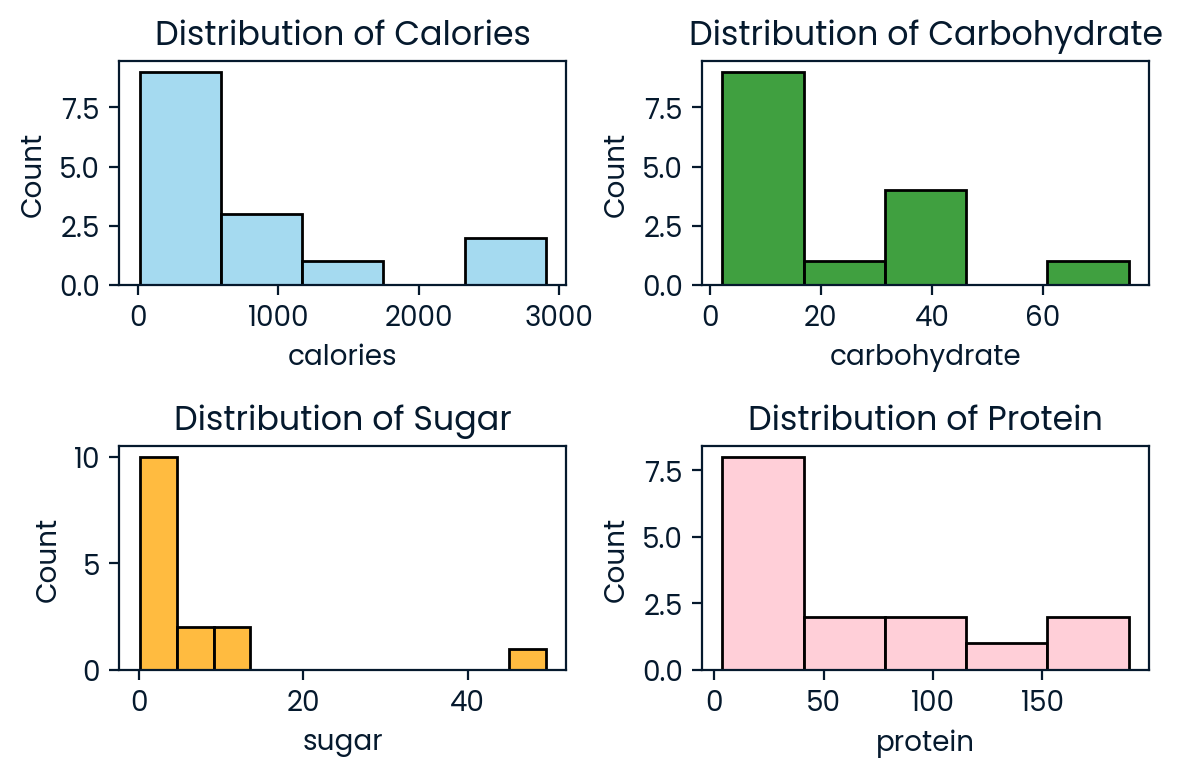

In [29]:
plot_distribution("Pork", 6)

In [30]:
# Call the function for Pork with 6 servings
fill_missing_values("Pork", 6)

# Check if the NaN values are filled for Pork
df[(df["category"] == "Pork") & (df["servings"] == 6)].isna().sum()

Pork 6 Serves Calories Median: 538.52
Pork 6 Serves Carbohydrate Median: 11.83
Pork 6 Serves Sugar Median: 2.53
Pork 6 Serves Protein Median: 35.12


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 6 Servings Lunch/Snacks

In [31]:
df[(servings_6) & (df["category"] == "Lunch/Snacks")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
33,34,497.17,1.47,1.51,2.97,Lunch/Snacks,6,True
58,59,6.23,56.43,5.60,2.12,Lunch/Snacks,6,True
157,158,766.80,13.60,8.27,17.85,Lunch/Snacks,6,False
205,206,283.72,34.05,1.63,0.92,Lunch/Snacks,6,True
275,276,597.55,19.65,6.19,6.63,Lunch/Snacks,6,True


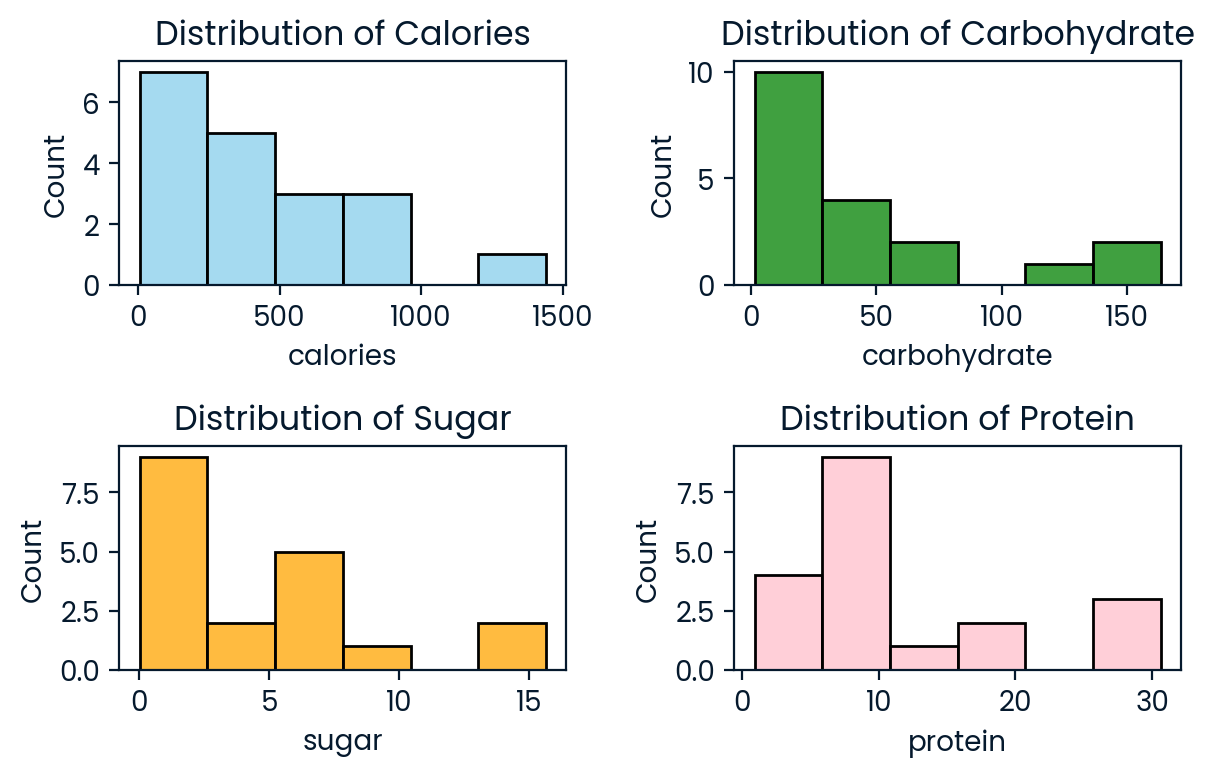

In [32]:
plot_distribution("Lunch/Snacks", 6)

In [33]:
# Call the function for Lunch/Snacks with 6 servings
fill_missing_values("Lunch/Snacks", 6)

# Check if the NaN values are filled for Lunch/Snacks
df[(df["category"] == "Lunch/Snacks") & (df["servings"] == 6)].isna().sum()

Lunch/Snacks 6 Serves Calories Median: 322.89
Lunch/Snacks 6 Serves Carbohydrate Median: 21.52
Lunch/Snacks 6 Serves Sugar Median: 3.38
Lunch/Snacks 6 Serves Protein Median: 7.73


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 6 Servings Chicken Breast

In [34]:
df[(servings_6) & (df["category"] == "Chicken Breast")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
40,41,621.54,14.16,10.70,39.69,Chicken Breast,6,True
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,True
166,167,25.83,0.13,2.24,28.60,Chicken Breast,6,False
197,198,278.05,9.85,12.93,26.75,Chicken Breast,6,True
233,234,523.69,1.98,0.72,41.55,Chicken Breast,6,True


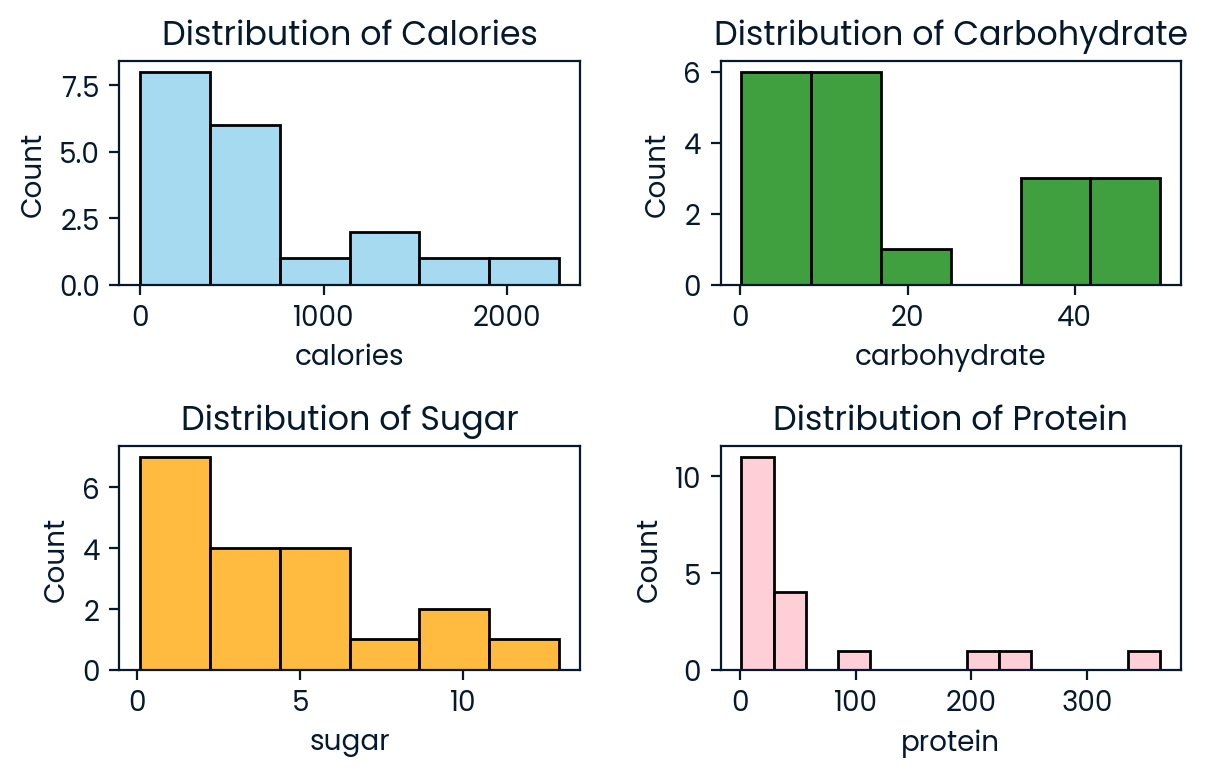

In [35]:
plot_distribution("Chicken Breast", 6)

In [36]:
# Call the function for Chicken Breast with 6 servings
fill_missing_values("Chicken Breast", 6)

# Check if the NaN values are filled for Chicken Breast
df[(df["category"] == "Chicken Breast") & (df["servings"] == 6)].isna().sum()

Chicken Breast 6 Serves Calories Median: 544.01
Chicken Breast 6 Serves Carbohydrate Median: 12.54
Chicken Breast 6 Serves Sugar Median: 4.01
Chicken Breast 6 Serves Protein Median: 26.75


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 6 Servings Dessert

In [37]:
df[(servings_6) & (df["category"] == "Dessert")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
108,109,612.64,38.55,10.06,5.65,Dessert,6,True
161,162,859.11,73.16,14.60,3.30,Dessert,6,True
181,182,580.94,23.16,20.99,5.63,Dessert,6,True
191,192,646.15,22.10,39.34,16.73,Dessert,6,False
218,219,166.44,0.53,29.68,4.86,Dessert,6,True


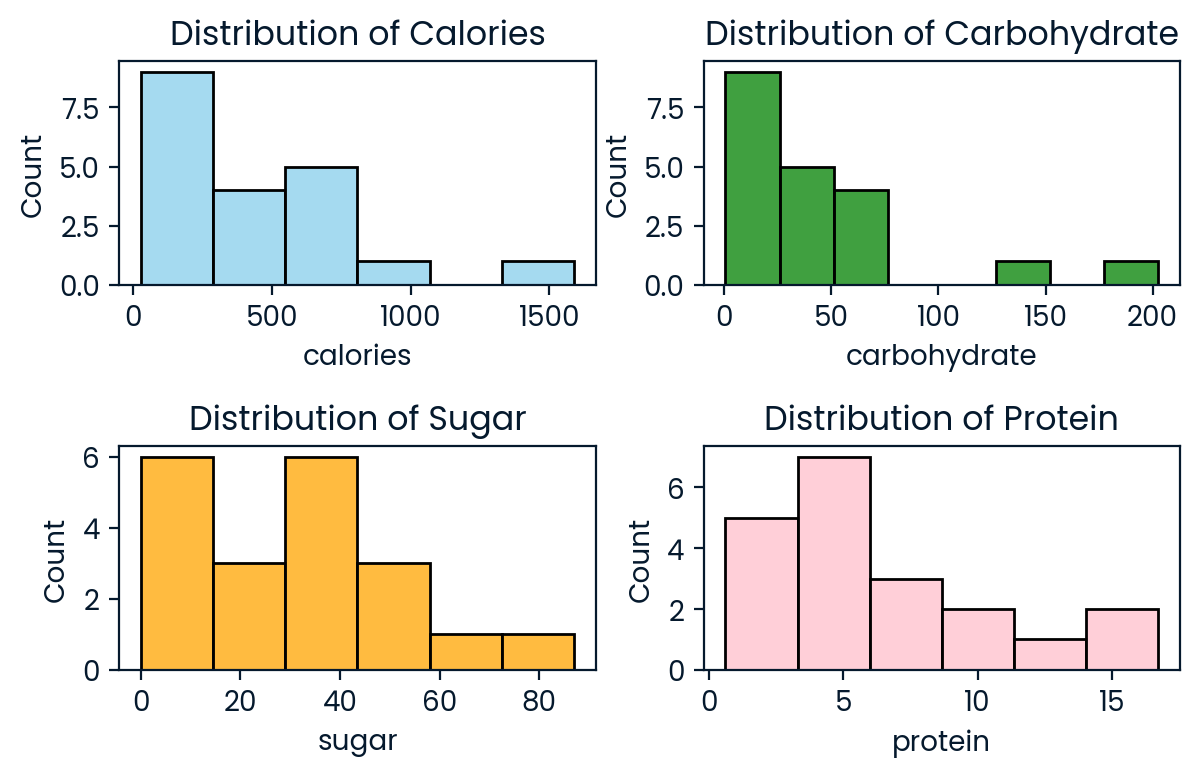

In [38]:
plot_distribution("Dessert", 6)

In [39]:
# Call the function for Dessert with 6 servings
fill_missing_values("Dessert", 6)

# Check if the NaN values are filled for Dessert
df[(df["category"] == "Dessert") & (df["servings"] == 6)].isna().sum()

Dessert 6 Serves Calories Median: 301.49
Dessert 6 Serves Carbohydrate Median: 27.78
Dessert 6 Serves Sugar Median: 29.7
Dessert 6 Serves Protein Median: 5.64


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 6 Servings Chicken

In [40]:
df[(servings_6) & (df["category"] == "Chicken")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
145,146,258.16,7.53,1.20,40.32,Chicken,6,False
196,197,216.10,7.93,1.20,151.64,Chicken,6,False
214,215,299.32,9.58,2.50,125.50,Chicken,6,True
248,249,208.87,32.34,7.41,6.42,Chicken,6,False
249,250,NaN,NaN,NaN,NaN,Chicken,6,False


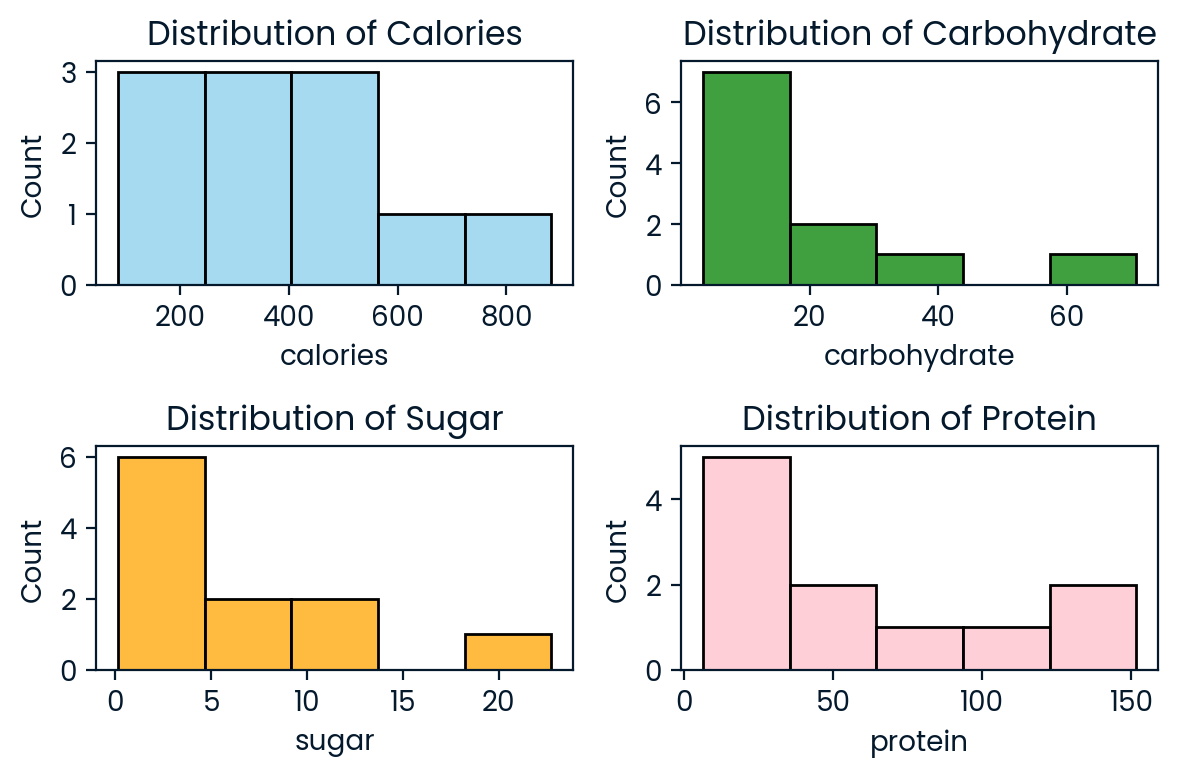

In [41]:
plot_distribution("Chicken", 6)

In [42]:
# Call the function for Chicken with 6 servings
fill_missing_values("Chicken", 6)

# Check if the NaN values are filled for Chicken
df[(df["category"] == "Chicken") & (df["servings"] == 6)].isna().sum()

Chicken 6 Serves Calories Median: 299.32
Chicken 6 Serves Carbohydrate Median: 9.58
Chicken 6 Serves Sugar Median: 3.17
Chicken 6 Serves Protein Median: 40.32


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Menu

In [43]:
servings_4 = df["servings"] == 4

df[servings_4]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,False
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,False
...,...,...,...,...,...,...,...,...
936,937,164.86,1.62,7.57,48.35,Pork,4,True
938,939,NaN,NaN,NaN,NaN,Pork,4,True
940,941,1337.50,49.91,0.76,57.90,Chicken,4,False
941,942,186.21,83.94,1.98,22.40,Chicken Breast,4,True


In [44]:
df[(servings_4) & (null_value)]["category"].unique()

array(['Chicken Breast', 'Meat', 'Pork', 'Dessert', 'Chicken',
       'Lunch/Snacks', 'Potato', 'Vegetable', 'One Dish Meal'],
      dtype=object)

### 4 Servings Chicken Breast

In [45]:
df[(servings_4) & (df["category"] == "Chicken Breast")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,False
32,33,347.06,9.50,5.92,82.58,Chicken Breast,4,False
38,39,264.62,1.50,18.44,32.62,Chicken Breast,4,False
43,44,262.12,17.46,0.33,87.05,Chicken Breast,4,False
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,False


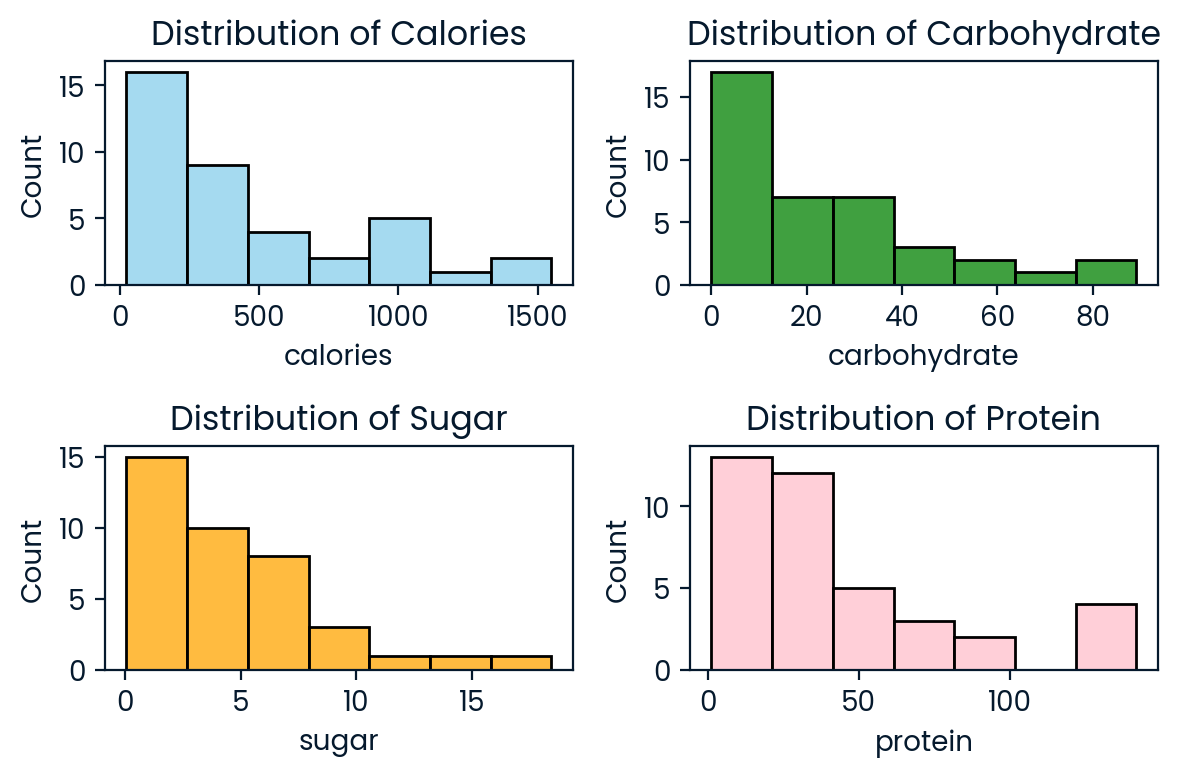

In [46]:
plot_distribution("Chicken Breast", 4)

In [47]:
# Call the function for Chicken Breast with 6 servings
fill_missing_values("Chicken Breast", 4)

# Check if the NaN values are filled for Chicken Breast
df[(df["category"] == "Chicken Breast") & (df["servings"] == 4)].isna().sum()

Chicken Breast 4 Serves Calories Median: 347.06
Chicken Breast 4 Serves Carbohydrate Median: 13.59
Chicken Breast 4 Serves Sugar Median: 3.3
Chicken Breast 4 Serves Protein Median: 33.31


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Meat

In [48]:
df[(servings_4) & (df["category"] == "Meat")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
14,15,217.14,6.69,10.00,15.17,Meat,4,True
64,65,566.20,1.72,2.54,4.24,Meat,4,True
82,83,NaN,NaN,NaN,NaN,Meat,4,True
86,87,113.03,23.45,0.47,62.08,Meat,4,True
103,104,1075.91,3.67,15.10,45.62,Meat,4,True


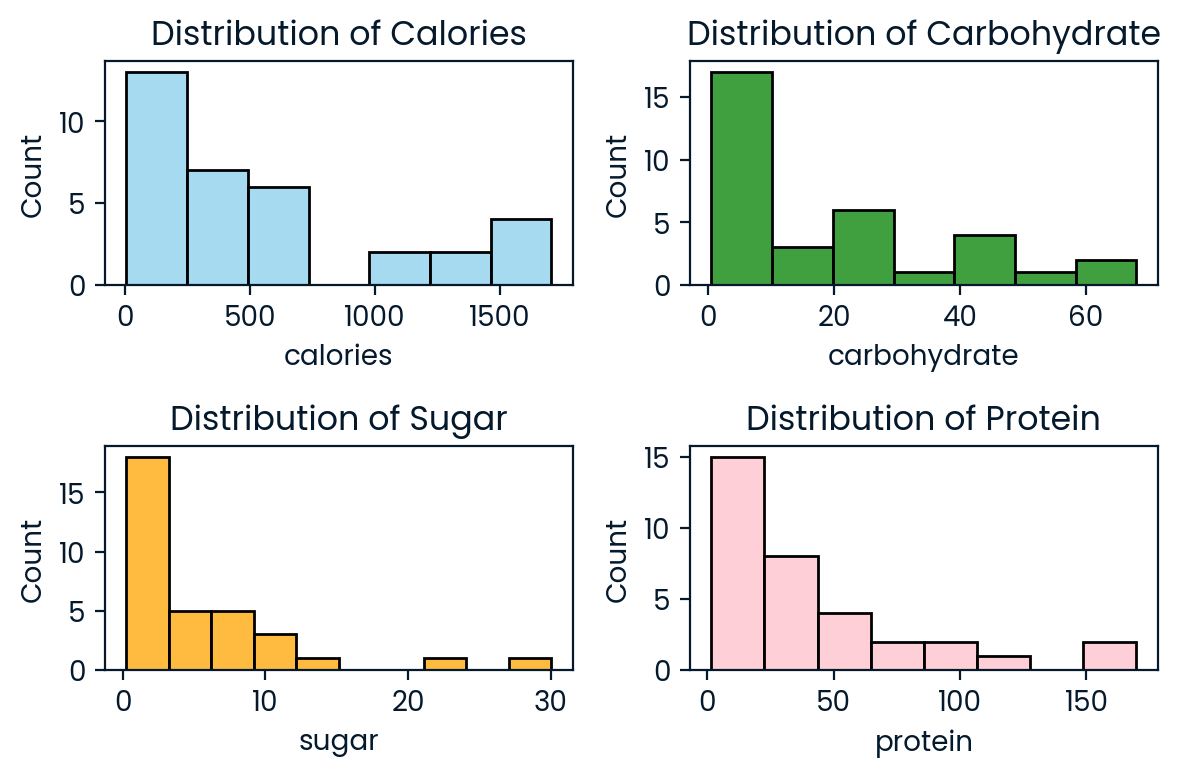

In [49]:
plot_distribution("Meat", 4)

In [50]:
# Call the function for Meat with 4 servings
fill_missing_values("Meat", 4)

# Check if the NaN values are filled for Pork
df[(df["category"] == "Meat") & (df["servings"] == 4)].isna().sum()

Meat 4 Serves Calories Median: 452.4
Meat 4 Serves Carbohydrate Median: 11.47
Meat 4 Serves Sugar Median: 2.75
Meat 4 Serves Protein Median: 24.96


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Pork

In [51]:
df[(servings_4) & (df["category"] == "Pork")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
51,52,1279.53,19.56,1.08,18.20,Pork,4,True
53,54,74.56,47.47,16.36,45.15,Pork,4,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True
206,207,551.70,1.11,5.90,186.18,Pork,4,True
208,209,10.21,44.63,17.74,13.51,Pork,4,True


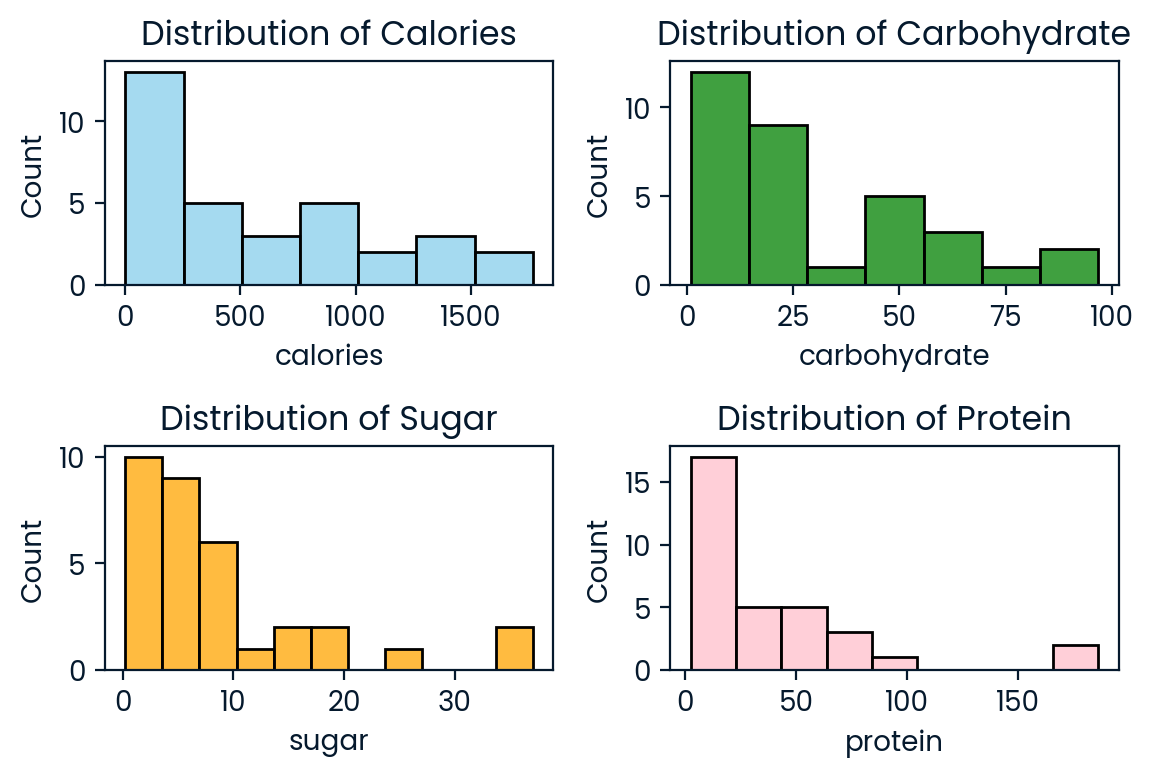

In [52]:
plot_distribution("Pork", 4)

In [53]:
# Call the function for Pork with 4 servings
fill_missing_values("Pork", 4)

# Check if the NaN values are filled for Pork
df[(df["category"] == "Meat") & (df["servings"] == 4)].isna().sum()

Pork 4 Serves Calories Median: 388.44
Pork 4 Serves Carbohydrate Median: 19.56
Pork 4 Serves Sugar Median: 5.9
Pork 4 Serves Protein Median: 22.45


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Dessert

In [54]:
df[(servings_4) & (df["category"] == "Dessert")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
21,22,40.53,87.91,104.91,11.93,Dessert,4,False
60,61,616.95,69.45,7.77,3.12,Dessert,4,True
132,133,93.62,3.74,29.41,4.62,Dessert,4,True
142,143,94.41,25.98,23.79,1.49,Dessert,4,True
159,160,777.37,101.73,2.52,5.12,Dessert,4,True


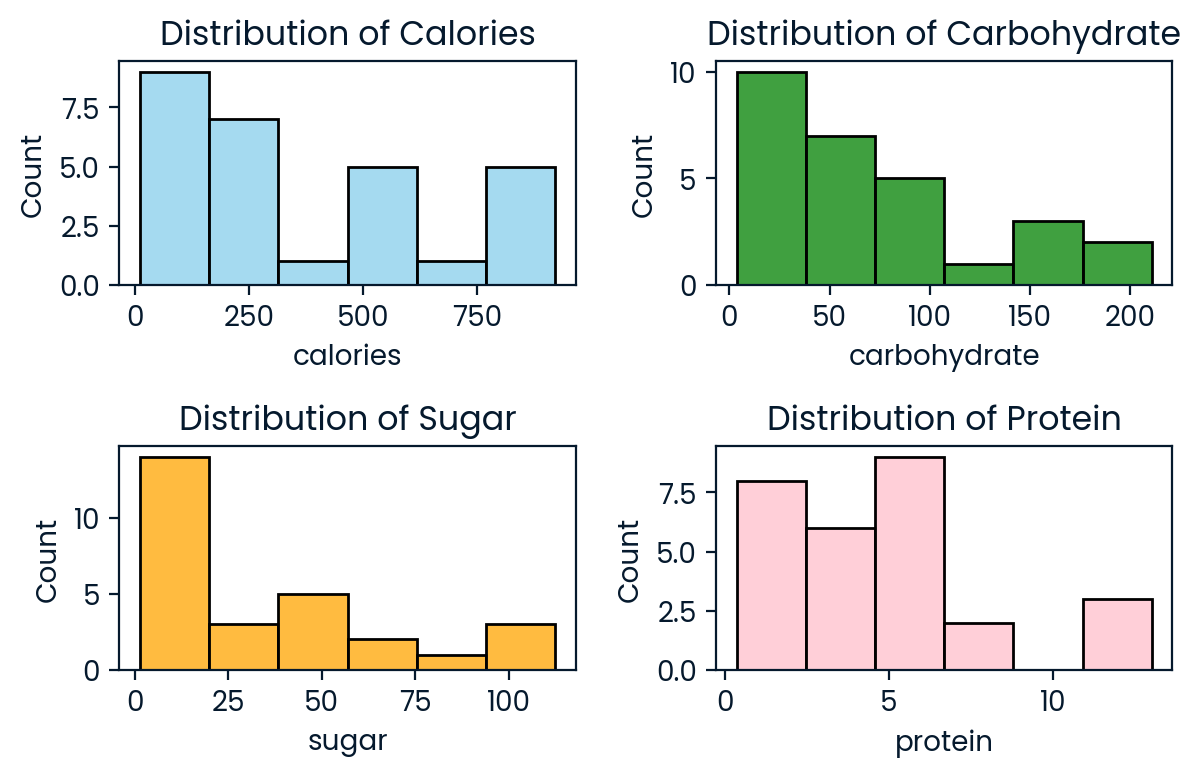

In [55]:
plot_distribution("Dessert", 4)

In [56]:
# Call the function for Dessert with 4 servings
fill_missing_values("Dessert", 4)

# Check if the NaN values are filled for Dessert
df[(df["category"] == "Dessert") & (df["servings"] == 4)].isna().sum()

Dessert 4 Serves Calories Median: 290.22
Dessert 4 Serves Carbohydrate Median: 63.76
Dessert 4 Serves Sugar Median: 20.93
Dessert 4 Serves Protein Median: 4.34


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Chicken

In [57]:
df[(servings_4) & (df["category"] == "Chicken")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
71,72,2508.47,18.11,10.60,84.23,Chicken,4,False
100,101,266.41,58.44,4.19,10.96,Chicken,4,False
148,149,205.98,61.85,2.89,14.45,Chicken,4,True
163,164,379.87,13.94,0.57,43.68,Chicken,4,True
238,239,581.70,11.48,7.94,13.64,Chicken,4,True


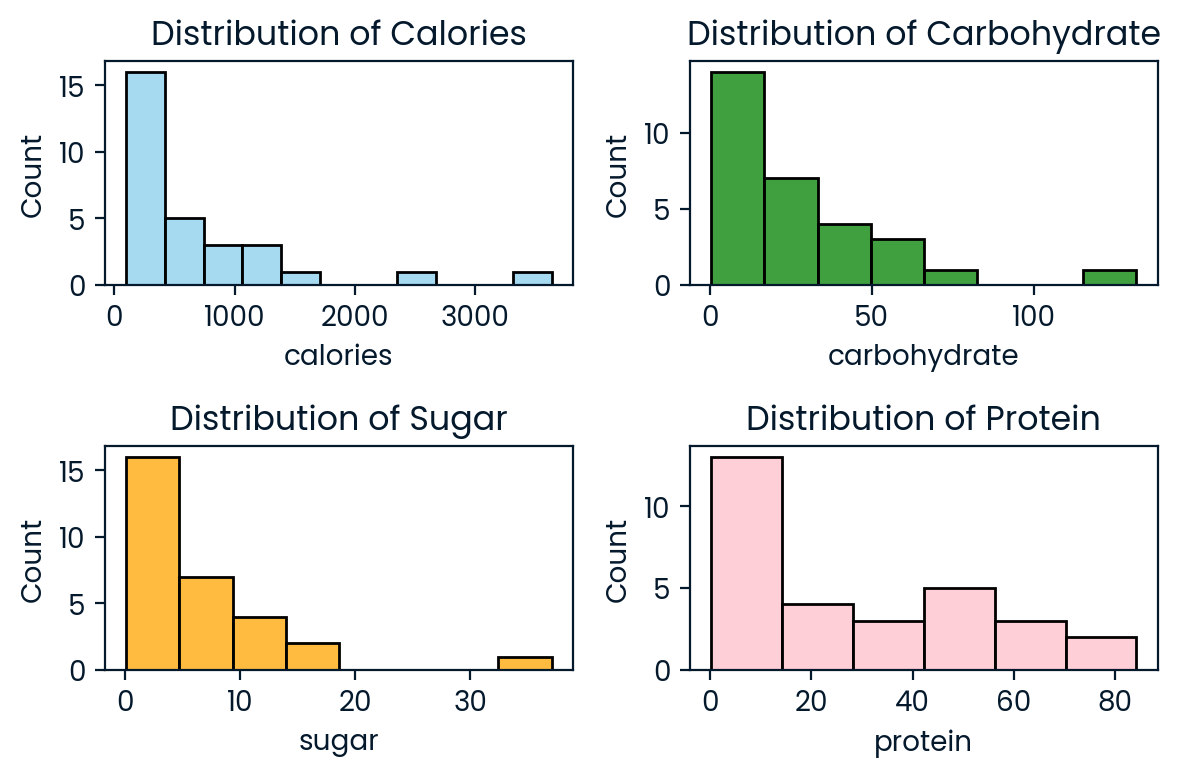

In [58]:
plot_distribution("Chicken", 4)

In [59]:
# Call the function for Chicken with 4 servings
fill_missing_values("Chicken", 4)

# Check if the NaN values are filled for Chicken
df[(df["category"] == "Chicken") & (df["servings"] == 4)].isna().sum()

Chicken 4 Serves Calories Median: 377.6
Chicken 4 Serves Carbohydrate Median: 17.7
Chicken 4 Serves Sugar Median: 4.49
Chicken 4 Serves Protein Median: 19.68


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Lunch/Snacks

In [60]:
df[(servings_4) & (df["category"] == "Lunch/Snacks")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,False
70,71,100.00,95.89,10.20,114.60,Lunch/Snacks,4,False
109,110,161.32,32.21,7.15,6.09,Lunch/Snacks,4,True
177,178,114.00,113.65,3.10,26.36,Lunch/Snacks,4,False
185,186,1266.75,154.18,0.59,0.46,Lunch/Snacks,4,True


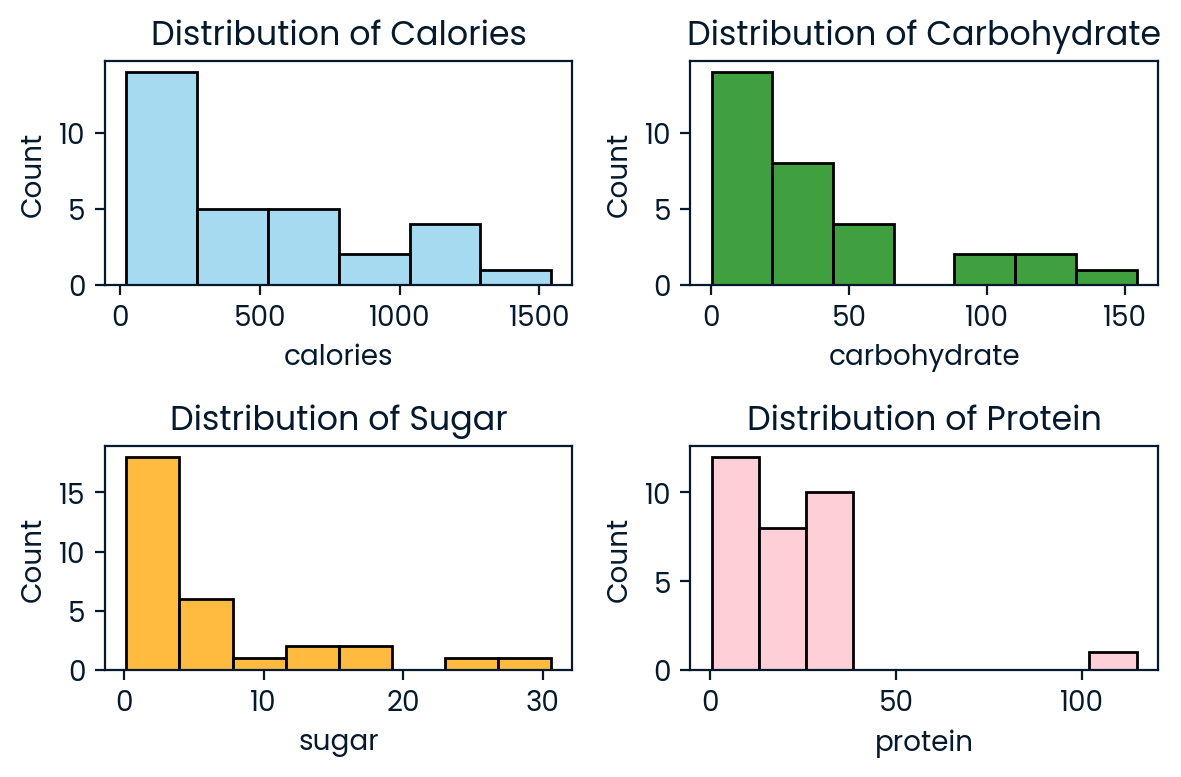

In [61]:
plot_distribution("Lunch/Snacks", 4)

In [62]:
# Call the function for Lunch/Snacks with 4 servings
fill_missing_values("Lunch/Snacks", 4)

# Check if the NaN values are filled for Lunch/Snacks
df[(df["category"] == "Lunch/Snacks") & (df["servings"] == 4)].isna().sum()

Lunch/Snacks 4 Serves Calories Median: 301.49
Lunch/Snacks 4 Serves Carbohydrate Median: 27.54
Lunch/Snacks 4 Serves Sugar Median: 2.97
Lunch/Snacks 4 Serves Protein Median: 17.79


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Potato

In [63]:
df[(servings_4) & (df["category"] == "Potato")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
12,13,274.63,23.49,1.56,2.57,Potato,4,True
27,28,574.75,13.12,1.84,13.85,Potato,4,True
75,76,767.16,24.76,0.57,31.07,Potato,4,True
94,95,826.83,145.32,6.48,3.04,Potato,4,True


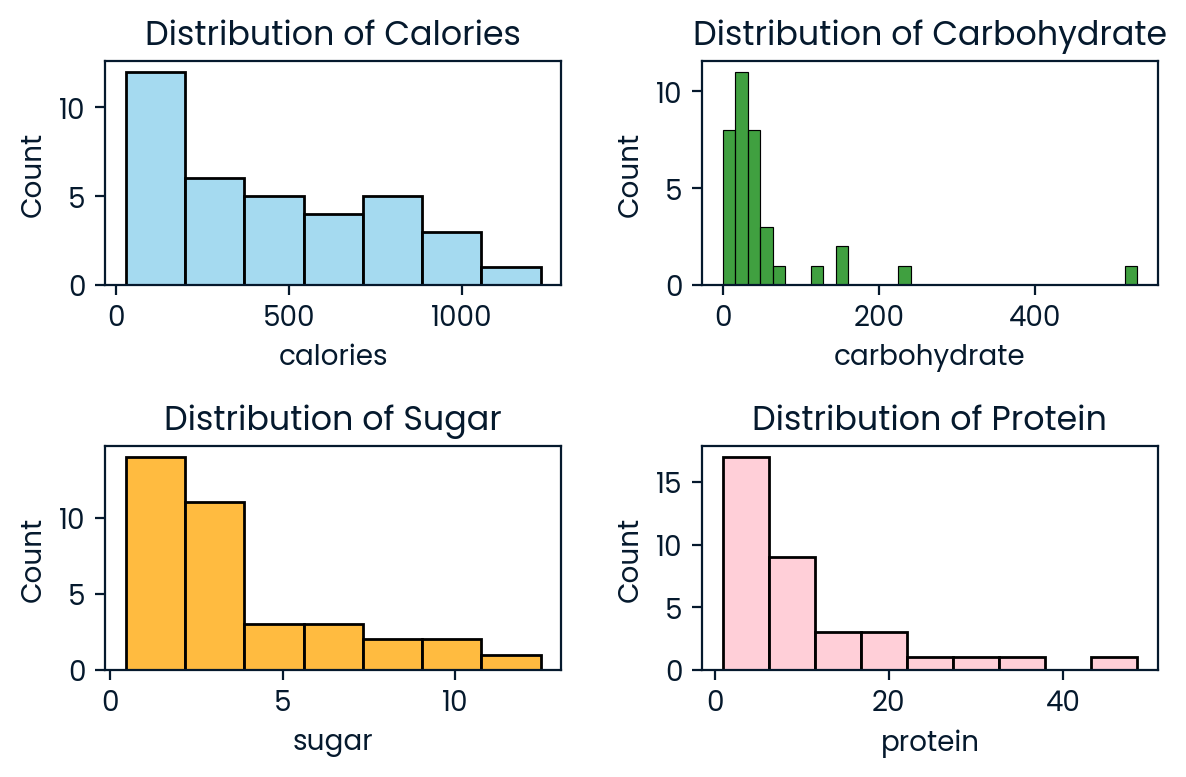

In [64]:
plot_distribution("Potato", 4)

In [65]:
# Call the function for Potato with 4 servings
fill_missing_values("Potato", 4)

# Check if the NaN values are filled for Potato
df[(df["category"] == "Potato") & (df["servings"] == 4)].isna().sum()

Potato 4 Serves Calories Median: 327.69
Potato 4 Serves Carbohydrate Median: 31.01
Potato 4 Serves Sugar Median: 2.64
Potato 4 Serves Protein Median: 6.42


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings Vegetable

In [66]:
df[(servings_4) & (df["category"] == "Vegetable")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
13,14,25.23,11.51,10.32,9.57,Vegetable,4,True
39,40,44.81,4.62,0.40,5.90,Vegetable,4,True
56,57,47.17,60.93,13.82,10.80,Vegetable,4,True
91,92,106.87,0.88,7.28,5.67,Vegetable,4,True
101,102,198.98,87.68,0.39,39.12,Vegetable,4,True


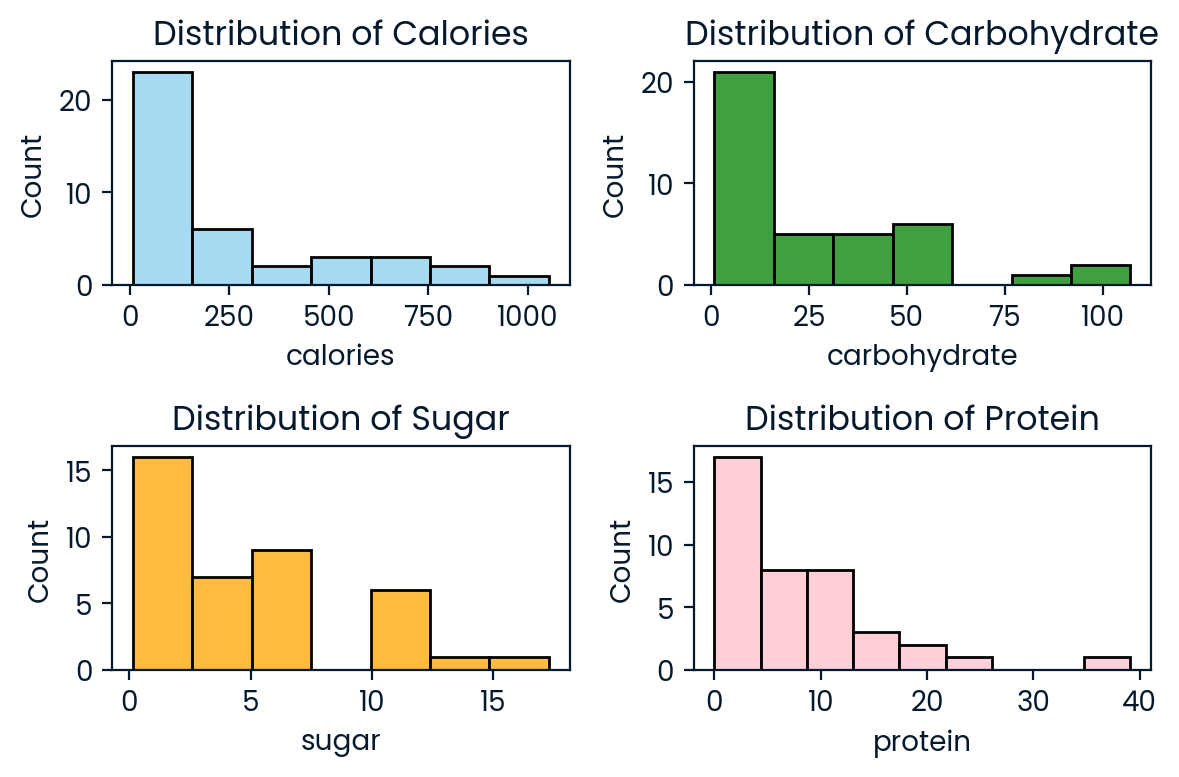

In [67]:
plot_distribution("Vegetable", 4)

In [68]:
# Call the function for Vegetable with 4 servings
fill_missing_values("Vegetable", 4)

# Check if the NaN values are filled for Vegetable
df[(df["category"] == "Vegetable") & (df["servings"] == 4)].isna().sum()

Vegetable 4 Serves Calories Median: 107.71
Vegetable 4 Serves Carbohydrate Median: 12.75
Vegetable 4 Serves Sugar Median: 4.5
Vegetable 4 Serves Protein Median: 5.6


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 4 Servings One Dish Meal

In [69]:
df[(servings_4) & (df["category"] == "One Dish Meal")].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
25,26,56.29,22.35,11.38,34.79,One Dish Meal,4,True
61,62,187.87,55.51,9.99,86.09,One Dish Meal,4,False
73,74,288.60,10.50,8.83,102.53,One Dish Meal,4,False
126,127,324.00,79.18,1.70,7.03,One Dish Meal,4,True
127,128,960.75,190.84,4.13,96.91,One Dish Meal,4,True


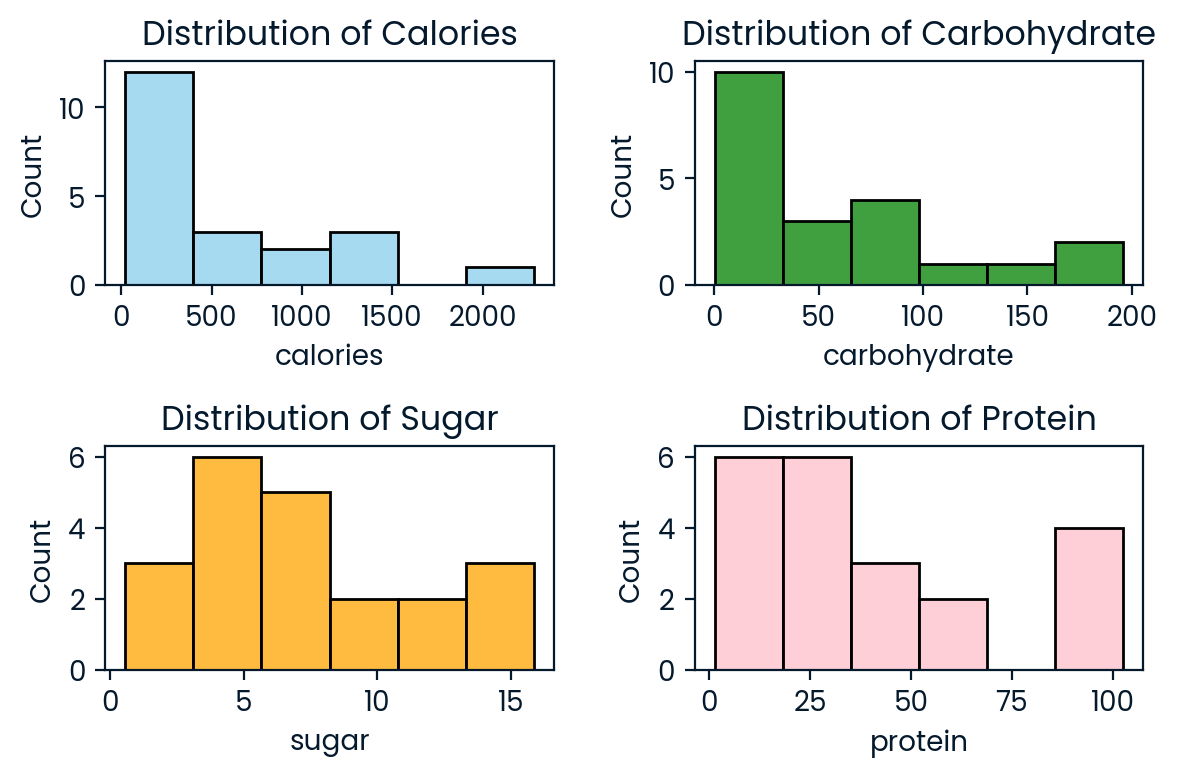

In [70]:
plot_distribution("One Dish Meal", 4)

In [71]:
# Call the function for One Dish Meal with 4 servings
fill_missing_values("One Dish Meal", 4)

# Check if the NaN values are filled for One Dish Meal
df[(df["category"] == "One Dish Meal") & (df["servings"] == 4)].isna().sum()

One Dish Meal 4 Serves Calories Median: 372.27
One Dish Meal 4 Serves Carbohydrate Median: 46.46
One Dish Meal 4 Serves Sugar Median: 7.6
One Dish Meal 4 Serves Protein Median: 31.19


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings Menu

In [72]:
servings_2 = df["servings"] == 2

df[servings_2].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
9,10,248.28,48.54,3.99,113.85,Chicken,2,False
16,17,454.27,1.87,2.95,61.07,Meat,2,True
19,20,127.55,27.55,1.51,8.91,Chicken,2,False
23,24,NaN,NaN,NaN,NaN,Meat,2,False


In [73]:
df[(servings_2) & (null_value)]["category"].unique()

array(['Meat', 'Dessert', 'One Dish Meal', 'Potato', 'Vegetable',
       'Chicken'], dtype=object)

### 2 Servings Meat

In [74]:
df[(servings_2) & (df["category"] == "Meat")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
16,17,454.27,1.87,2.95,61.07,Meat,2,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
113,114,76.77,48.84,22.95,4.88,Meat,2,True
120,121,1114.94,31.45,13.02,1.33,Meat,2,True
305,306,649.83,21.64,1.69,0.13,Meat,2,True
425,426,1263.15,5.14,16.54,100.46,Meat,2,True
487,488,1295.21,34.77,0.75,171.22,Meat,2,True
546,547,1375.20,18.79,27.83,29.60,Meat,2,False
551,552,238.30,0.21,9.43,2.64,Meat,2,False
555,556,NaN,NaN,NaN,NaN,Meat,2,False


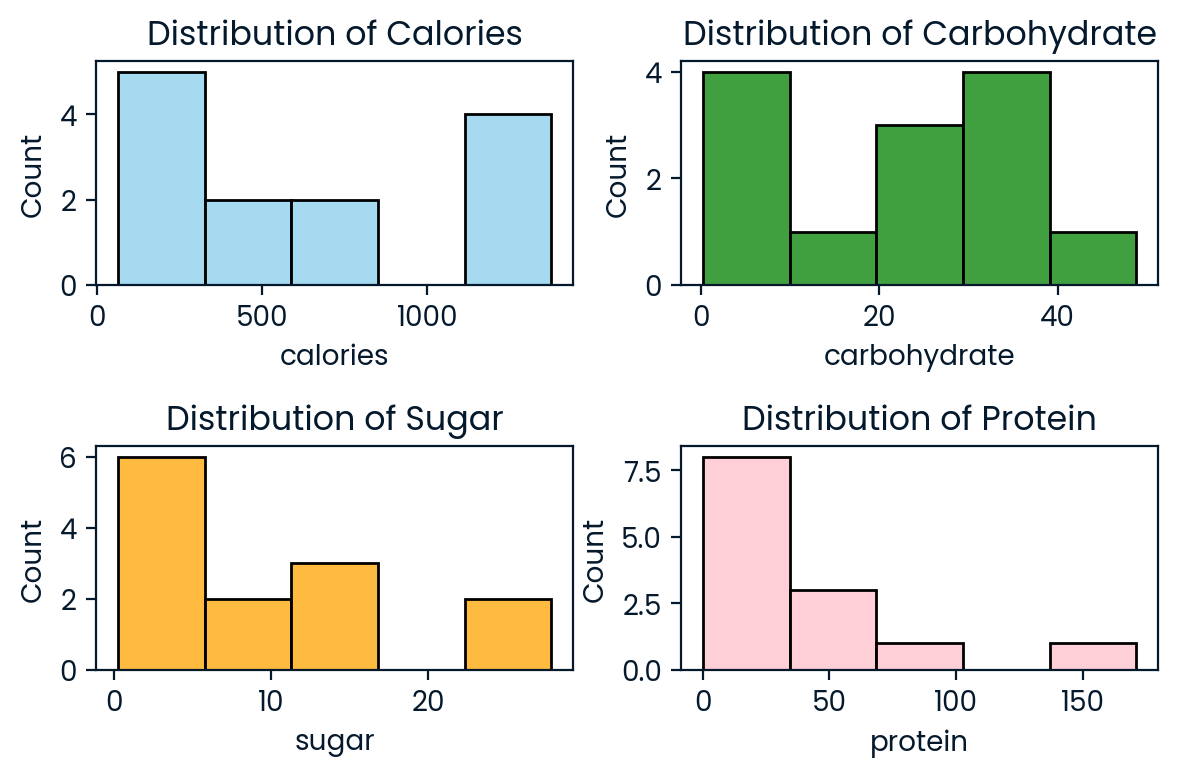

In [75]:
plot_distribution("Meat", 2)

In [76]:
# Call the function for Meat with 2 servings
fill_missing_values("Meat", 2)

# Check if the NaN values are filled for Meat
df[(df["category"] == "Meat") & (df["servings"] == 2)].isna().sum()

Meat 2 Serves Calories Median: 504.2
Meat 2 Serves Carbohydrate Median: 27.24
Meat 2 Serves Sugar Median: 7.79
Meat 2 Serves Protein Median: 29.33


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings Dessert

In [77]:
df[(servings_2) & (df["category"] == "Dessert")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
59,60,384.93,74.38,76.53,2.17,Dessert,2,False
77,78,65.52,2.67,0.07,0.51,Dessert,2,False
118,119,28.83,31.55,38.36,3.57,Dessert,2,False
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
173,174,180.52,12.40,24.65,5.08,Dessert,2,True
209,210,NaN,NaN,NaN,NaN,Dessert,2,True
290,291,239.90,51.13,131.39,3.38,Dessert,2,True
445,446,374.35,15.19,9.22,2.49,Dessert,2,True
496,497,260.15,23.07,71.52,3.22,Dessert,2,True
621,622,438.66,127.47,3.61,0.07,Dessert,2,True


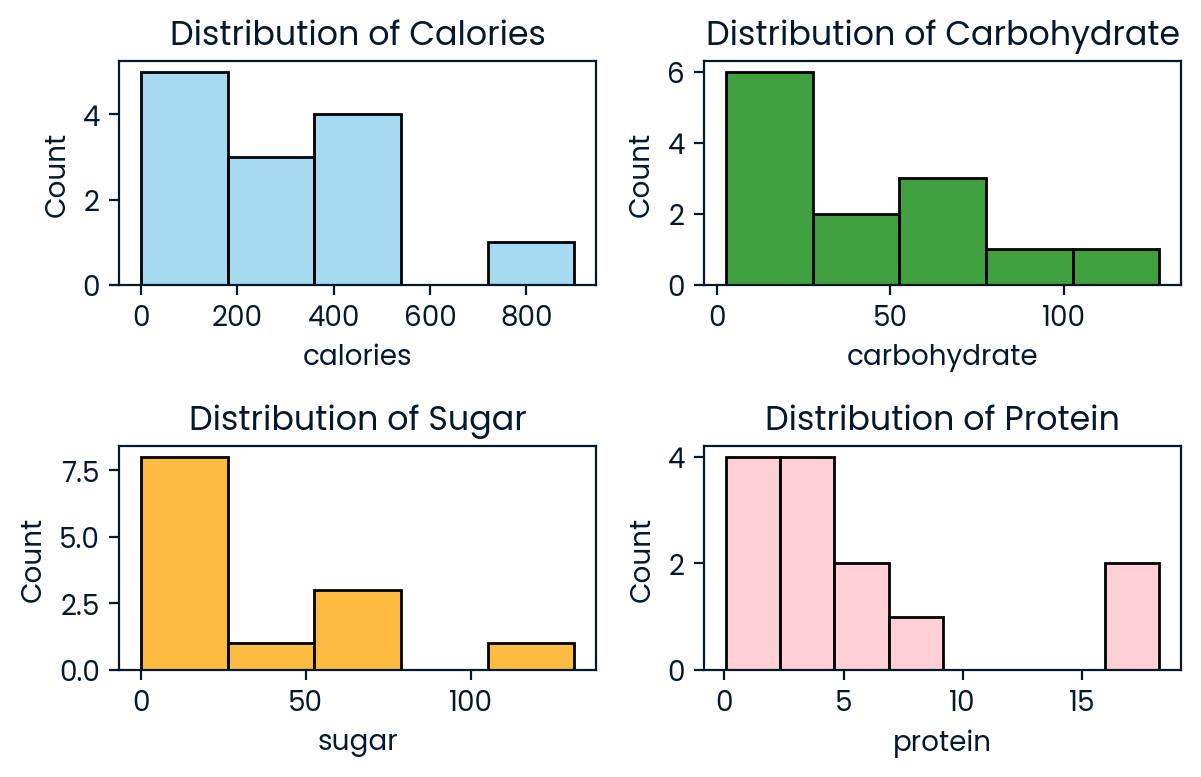

In [78]:
plot_distribution("Dessert", 2)

In [79]:
# Call the function for Dessert with 2 servings
fill_missing_values("Dessert", 2)

# Check if the NaN values are filled for Dessert
df[(df["category"] == "Dessert") & (df["servings"] == 2)].isna().sum()

Dessert 2 Serves Calories Median: 239.9
Dessert 2 Serves Carbohydrate Median: 31.55
Dessert 2 Serves Sugar Median: 23.19
Dessert 2 Serves Protein Median: 3.38


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings One Dish Meal

In [80]:
df[(servings_2) & (df["category"] == "One Dish Meal")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
29,30,164.76,33.58,17.87,220.14,One Dish Meal,2,True
42,43,576.89,4.79,20.92,4.29,One Dish Meal,2,False
62,63,160.05,42.45,1.60,44.38,One Dish Meal,2,True
97,98,2081.69,8.09,4.78,28.48,One Dish Meal,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
170,171,431.28,14.69,4.17,32.79,One Dish Meal,2,True
203,204,66.16,10.45,1.07,8.81,One Dish Meal,2,True
240,241,539.78,14.84,17.29,21.55,One Dish Meal,2,False
302,303,889.25,13.44,1.61,2.58,One Dish Meal,2,False


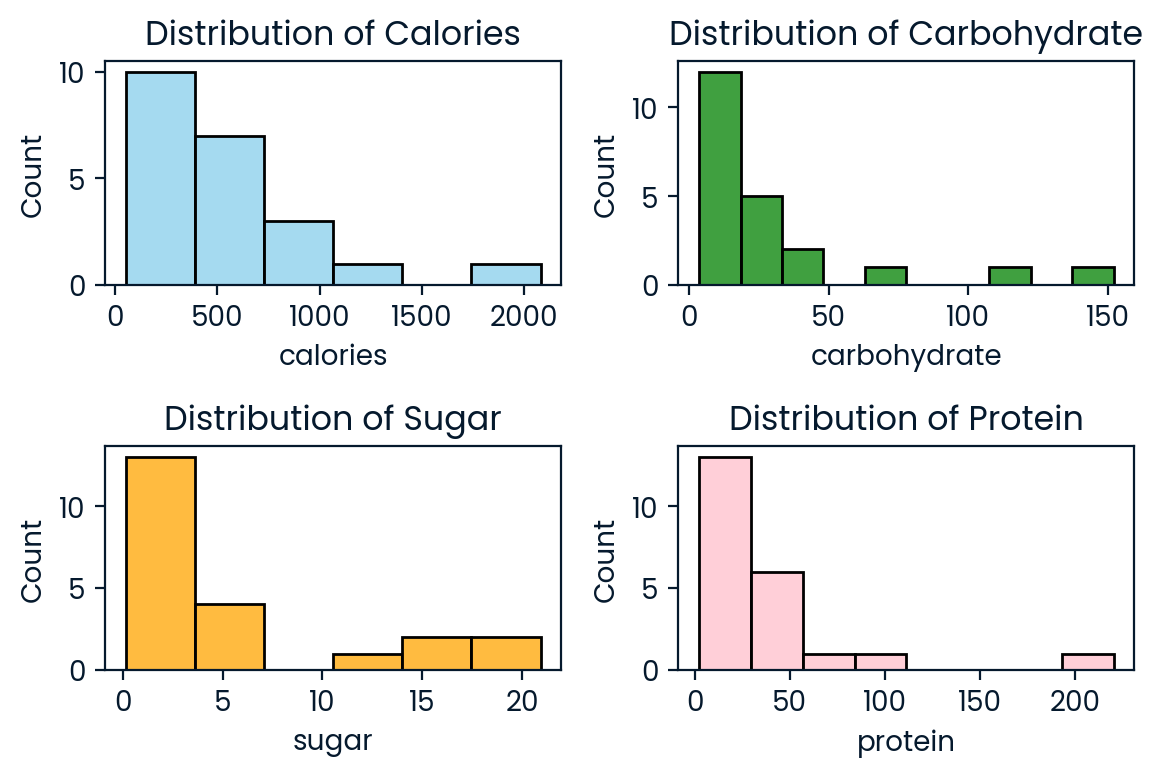

In [81]:
plot_distribution("One Dish Meal", 2)

In [82]:
# Call the function for One Dish Meal with 2 servings
fill_missing_values("One Dish Meal", 2)

# Check if the NaN values are filled for One Dish Meal
df[(df["category"] == "One Dish Meal") & (df["servings"] == 2)].isna().sum()

One Dish Meal 2 Serves Calories Median: 436.72
One Dish Meal 2 Serves Carbohydrate Median: 14.76
One Dish Meal 2 Serves Sugar Median: 2.36
One Dish Meal 2 Serves Protein Median: 23.64


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings Potato

In [83]:
df[(servings_2) & (df["category"] == "Potato")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
28,29,595.39,62.67,2.64,4.96,Potato,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
245,246,337.48,27.98,2.26,19.05,Potato,2,True
256,257,682.73,31.36,5.70,3.58,Potato,2,True
261,262,137.63,191.21,2.05,5.33,Potato,2,True
359,360,136.46,31.09,2.40,6.77,Potato,2,True
380,381,434.29,64.57,2.91,7.16,Potato,2,True
577,578,23.45,17.98,7.10,9.73,Potato,2,True
644,645,26.16,32.73,1.32,0.73,Potato,2,True
761,762,197.73,224.16,2.97,1.26,Potato,2,True


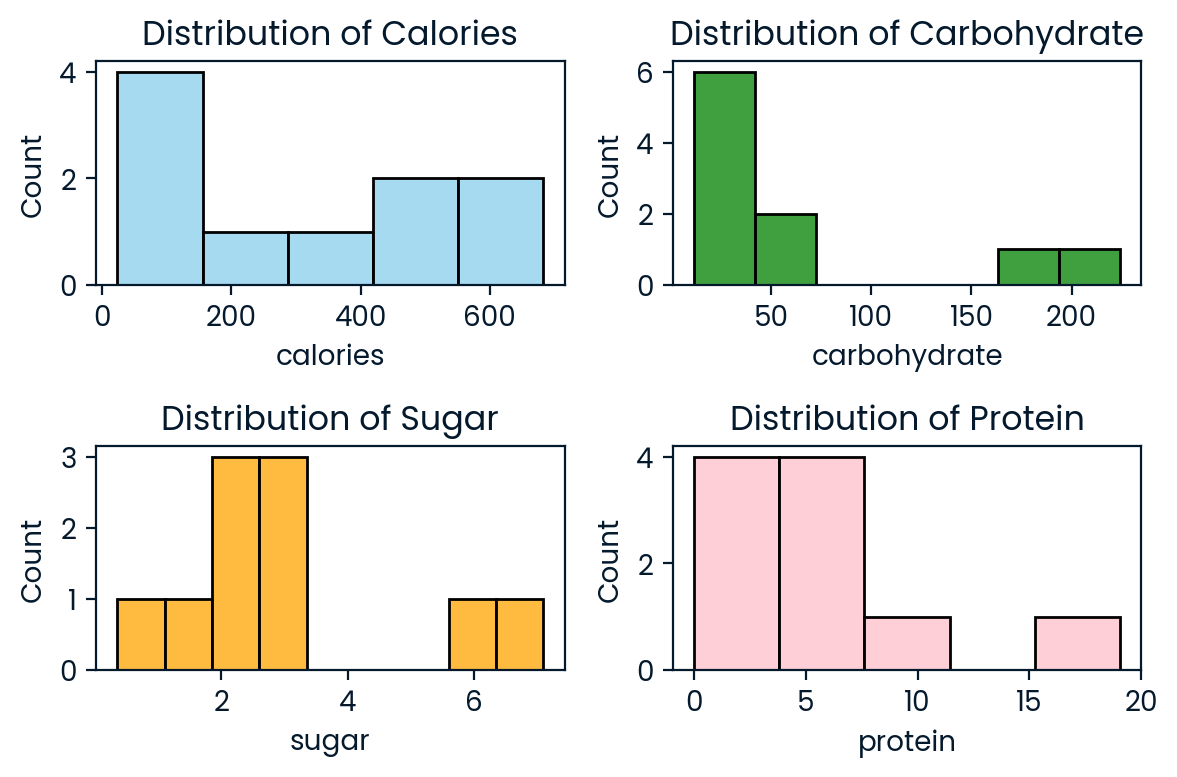

In [84]:
plot_distribution("Potato", 2)

In [85]:
# Call the function for Potato with 2 servings
fill_missing_values("Potato", 2)

# Check if the NaN values are filled for Potato
df[(df["category"] == "Potato") & (df["servings"] == 2)].isna().sum()

Potato 2 Serves Calories Median: 267.6
Potato 2 Serves Carbohydrate Median: 32.04
Potato 2 Serves Sugar Median: 2.52
Potato 2 Serves Protein Median: 5.14


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings Vegetable

In [86]:
df[(servings_2) & (df["category"] == "Vegetable")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
200,201,89.72,10.83,2.26,4.52,Vegetable,2,True
231,232,247.79,32.82,4.57,10.06,Vegetable,2,True
246,247,71.97,16.94,0.95,3.37,Vegetable,2,True
259,260,674.84,2.64,3.64,1.26,Vegetable,2,True
276,277,0.76,1.90,3.76,0.05,Vegetable,2,True
295,296,158.46,20.62,6.30,4.75,Vegetable,2,True
301,302,293.86,11.43,3.16,0.98,Vegetable,2,True
372,373,NaN,NaN,NaN,NaN,Vegetable,2,True
375,376,265.71,11.68,11.70,0.79,Vegetable,2,True
461,462,349.29,6.18,1.92,25.18,Vegetable,2,True


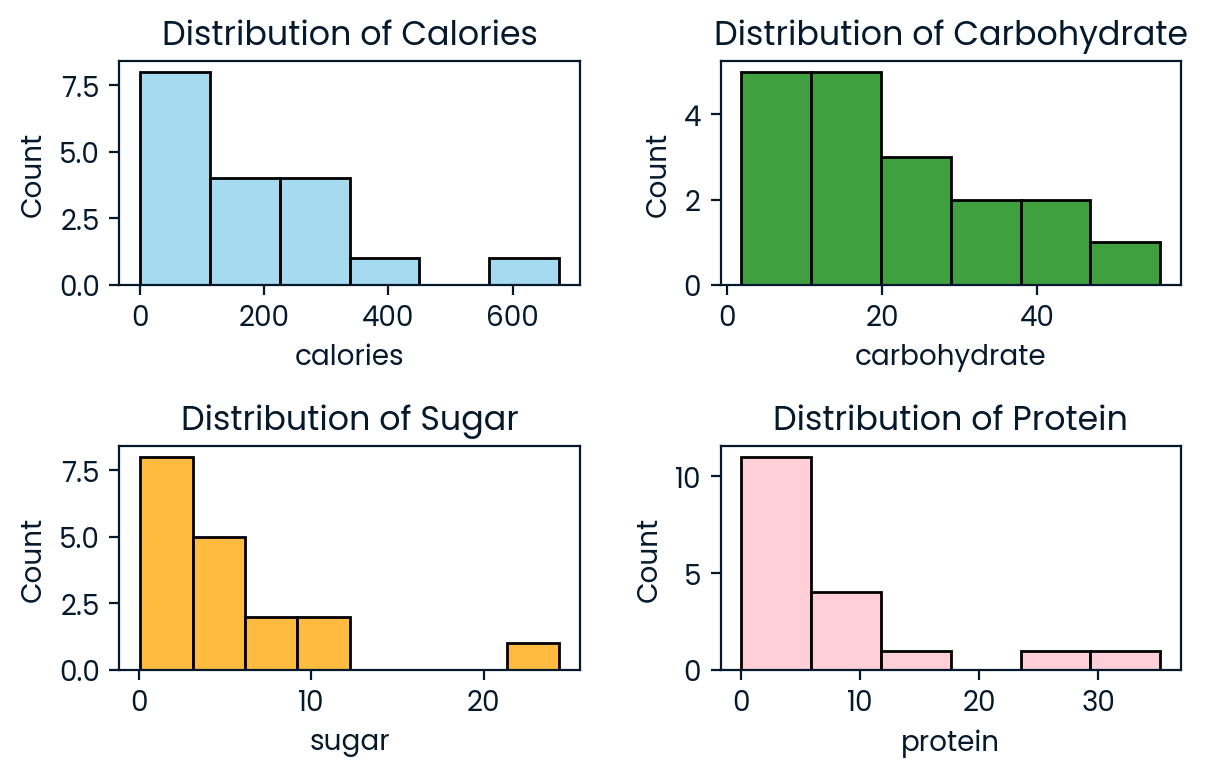

In [87]:
plot_distribution("Vegetable", 2)

In [88]:
# Call the function for Vegetable with 2 servings
fill_missing_values("Vegetable", 2)

# Check if the NaN values are filled for Vegetable
df[(df["category"] == "Vegetable") & (df["servings"] == 2)].isna().sum()

Vegetable 2 Serves Calories Median: 115.0
Vegetable 2 Serves Carbohydrate Median: 17.37
Vegetable 2 Serves Sugar Median: 3.4
Vegetable 2 Serves Protein Median: 4.64


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 2 Servings Chicken

In [89]:
df[(servings_2) & (df["category"] == "Chicken")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
9,10,248.28,48.54,3.99,113.85,Chicken,2,False
19,20,127.55,27.55,1.51,8.91,Chicken,2,False
52,53,367.30,89.84,6.96,73.35,Chicken,2,False
84,85,85.17,29.96,0.57,5.24,Chicken,2,True
239,240,593.56,243.20,0.60,2.56,Chicken,2,False
397,398,2051.34,2.46,2.12,69.62,Chicken,2,True
447,448,452.51,2.86,9.50,16.78,Chicken,2,False
534,535,NaN,NaN,NaN,NaN,Chicken,2,True
594,595,351.61,18.84,10.87,9.62,Chicken,2,False
695,696,891.11,15.20,1.50,286.97,Chicken,2,False


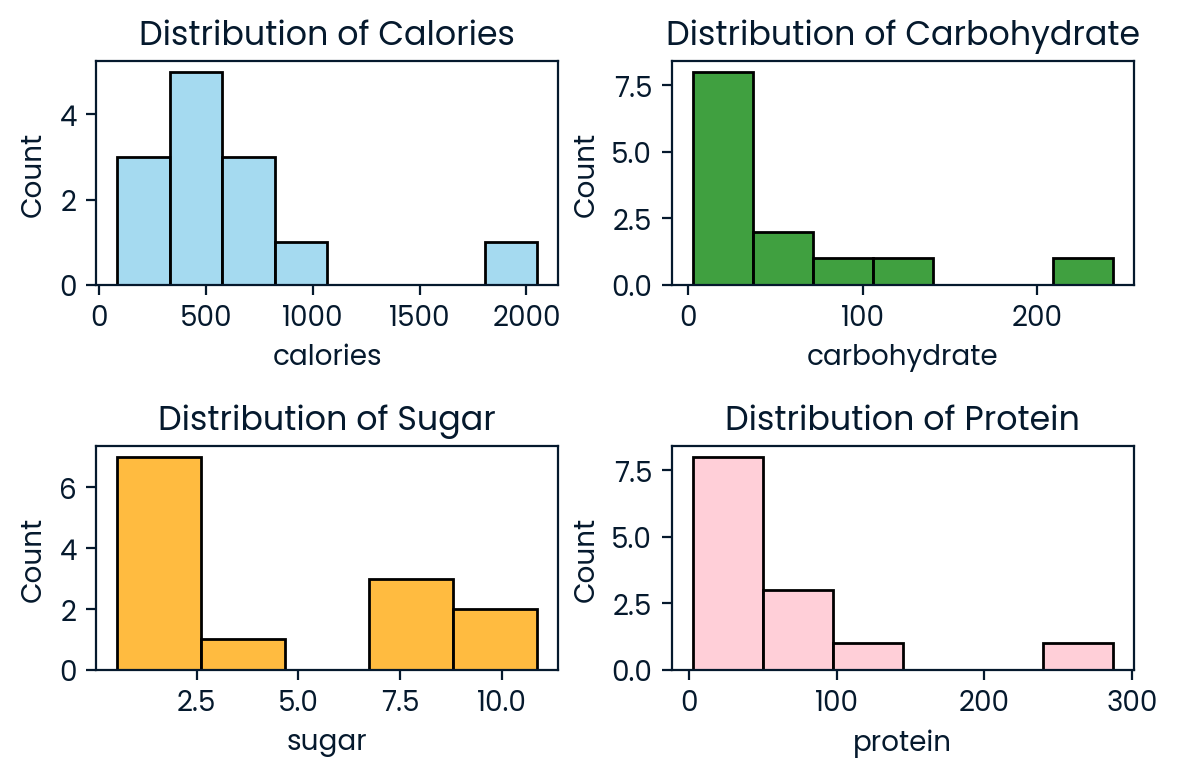

In [90]:
plot_distribution("Chicken", 2)

In [91]:
# Call the function for Chicken with 2 servings
fill_missing_values("Chicken", 2)

# Check if the NaN values are filled for Chicken
df[(df["category"] == "Chicken") & (df["servings"] == 2)].isna().sum()

Chicken 2 Serves Calories Median: 452.51
Chicken 2 Serves Carbohydrate Median: 27.55
Chicken 2 Serves Sugar Median: 2.33
Chicken 2 Serves Protein Median: 24.1


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Serving Menu

In [92]:
servings_1 = df["servings"] == 1

df[servings_1].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
10,11,170.12,17.63,4.10,0.91,Beverages,1,False
17,18,1695.82,0.10,0.39,33.17,Meat,1,True
24,25,1161.49,1.53,8.88,12.57,Breakfast,1,True
36,37,1321.78,70.07,7.75,19.51,Breakfast,1,False


In [93]:
df[(servings_1) & (null_value)]["category"].unique()

array(['Dessert', 'Meat', 'Vegetable', 'Chicken', 'Potato', 'Pork'],
      dtype=object)

### 1 Servings Dessert

In [94]:
df[(servings_1) & (df["category"] == "Dessert")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
65,66,260.33,0.51,1.24,4.53,Dessert,1,False
74,75,320.57,83.79,16.24,2.07,Dessert,1,True
96,97,88.57,14.31,47.32,5.67,Dessert,1,True
133,134,959.51,4.40,44.54,12.12,Dessert,1,False
167,168,4.41,239.06,19.54,3.76,Dessert,1,True
194,195,267.51,15.99,5.77,0.95,Dessert,1,False
221,222,NaN,NaN,NaN,NaN,Dessert,1,False
271,272,435.94,58.65,39.46,11.18,Dessert,1,True
378,379,235.91,43.20,41.24,4.27,Dessert,1,True
540,541,60.62,140.98,148.75,5.53,Dessert,1,False


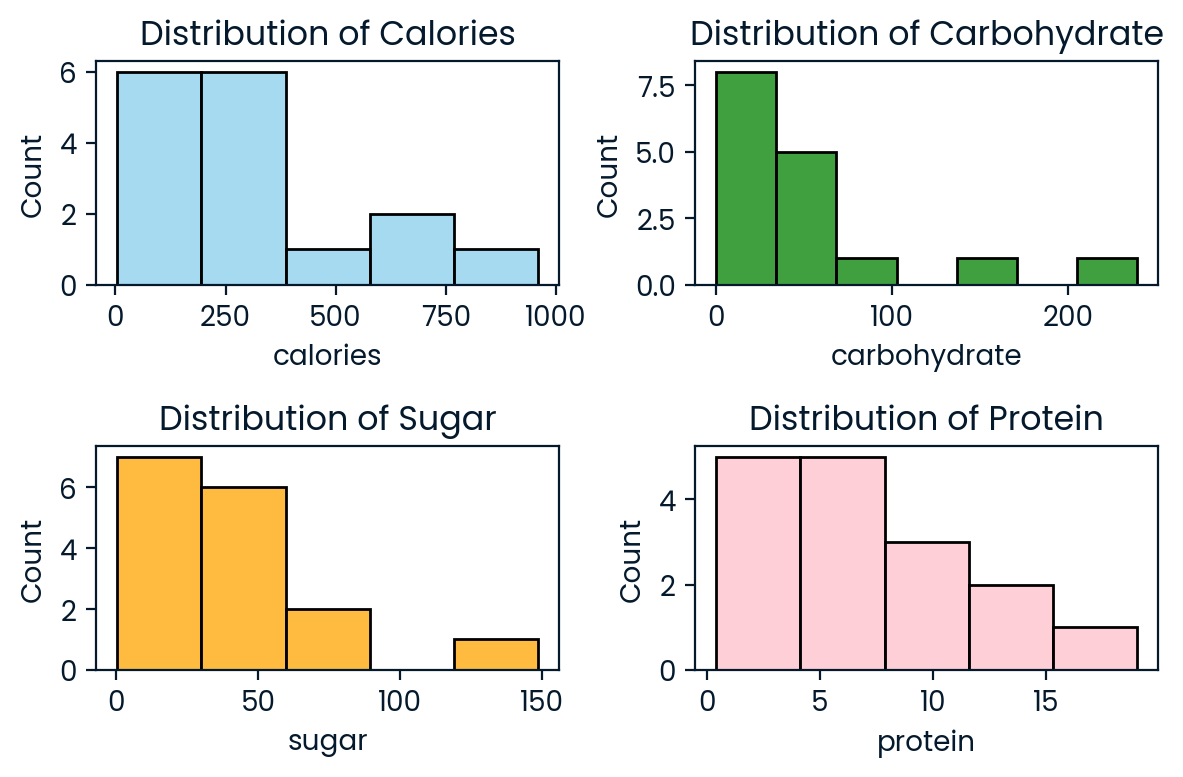

In [95]:
plot_distribution("Dessert", 1)

In [96]:
# Call the function for Dessert with 1 servings
fill_missing_values("Dessert", 1)

# Check if the NaN values are filled for Dessert
df[(df["category"] == "Dessert") & (df["servings"] == 1)].isna().sum()

Dessert 1 Serves Calories Median: 263.92
Dessert 1 Serves Carbohydrate Median: 31.18
Dessert 1 Serves Sugar Median: 40.35
Dessert 1 Serves Protein Median: 5.6


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Servings Meat

In [97]:
df[(servings_1) & (df["category"] == "Meat")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
17,18,1695.82,0.10,0.39,33.17,Meat,1,True
85,86,662.78,47.61,4.08,2.39,Meat,1,True
106,107,766.01,9.43,0.82,66.71,Meat,1,False
111,112,409.66,31.32,13.83,29.86,Meat,1,True
198,199,641.05,26.99,1.08,20.20,Meat,1,False
213,214,816.25,5.42,8.24,37.47,Meat,1,True
280,281,NaN,NaN,NaN,NaN,Meat,1,True
428,429,1646.83,101.11,2.77,14.87,Meat,1,True
499,500,333.01,19.44,0.69,12.47,Meat,1,True
604,605,9.52,6.40,8.36,49.57,Meat,1,True


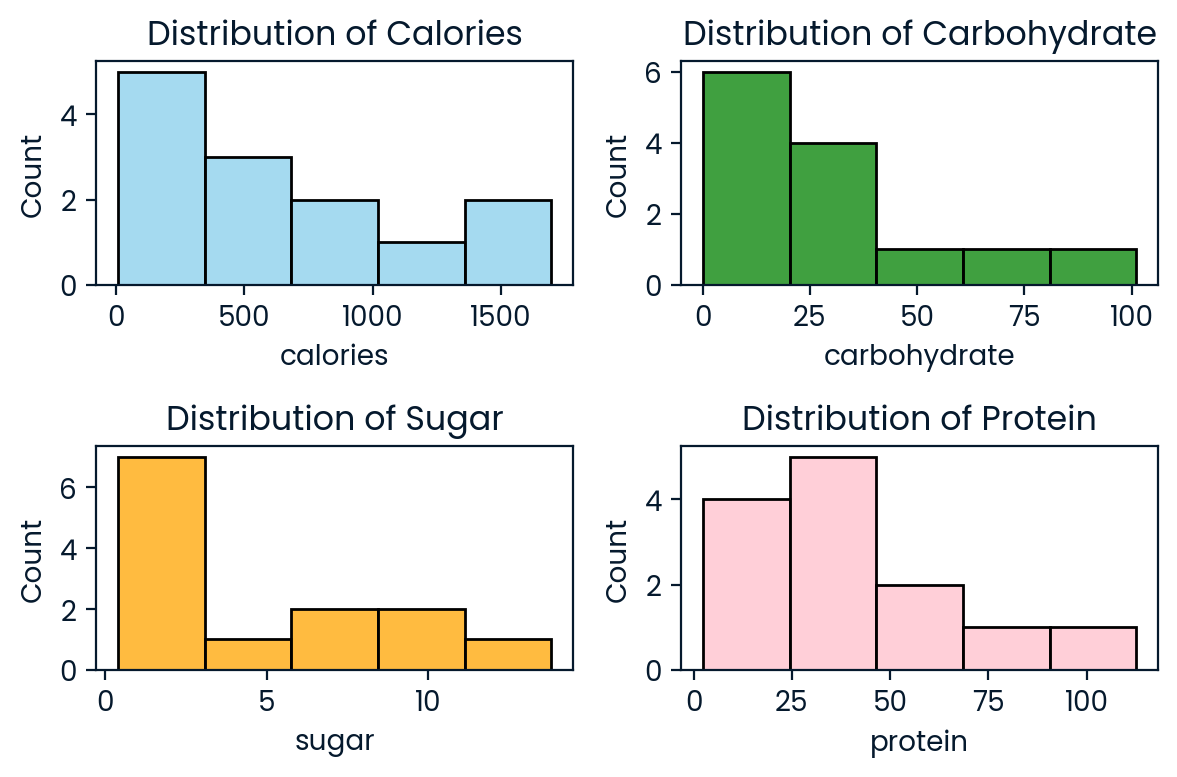

In [98]:
plot_distribution("Meat", 1)

In [99]:
# Call the function for Meat with 1 servings
fill_missing_values("Meat", 1)

# Check if the NaN values are filled for Meat
df[(df["category"] == "Meat") & (df["servings"] == 1)].isna().sum()

Meat 1 Serves Calories Median: 641.05
Meat 1 Serves Carbohydrate Median: 20.96
Meat 1 Serves Sugar Median: 2.88
Meat 1 Serves Protein Median: 33.17


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Servings Vegetable

In [100]:
df[(servings_1) & (df["category"] == "Vegetable")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
107,108,196.68,2.28,9.12,2.17,Vegetable,1,True
151,152,311.39,43.20,1.13,3.36,Vegetable,1,True
257,258,575.07,69.94,1.18,1.80,Vegetable,1,True
464,465,108.58,21.67,0.24,11.24,Vegetable,1,True
530,531,NaN,NaN,NaN,NaN,Vegetable,1,True
622,623,131.92,7.94,2.42,3.56,Vegetable,1,True
825,826,12.24,37.13,3.39,0.28,Vegetable,1,True


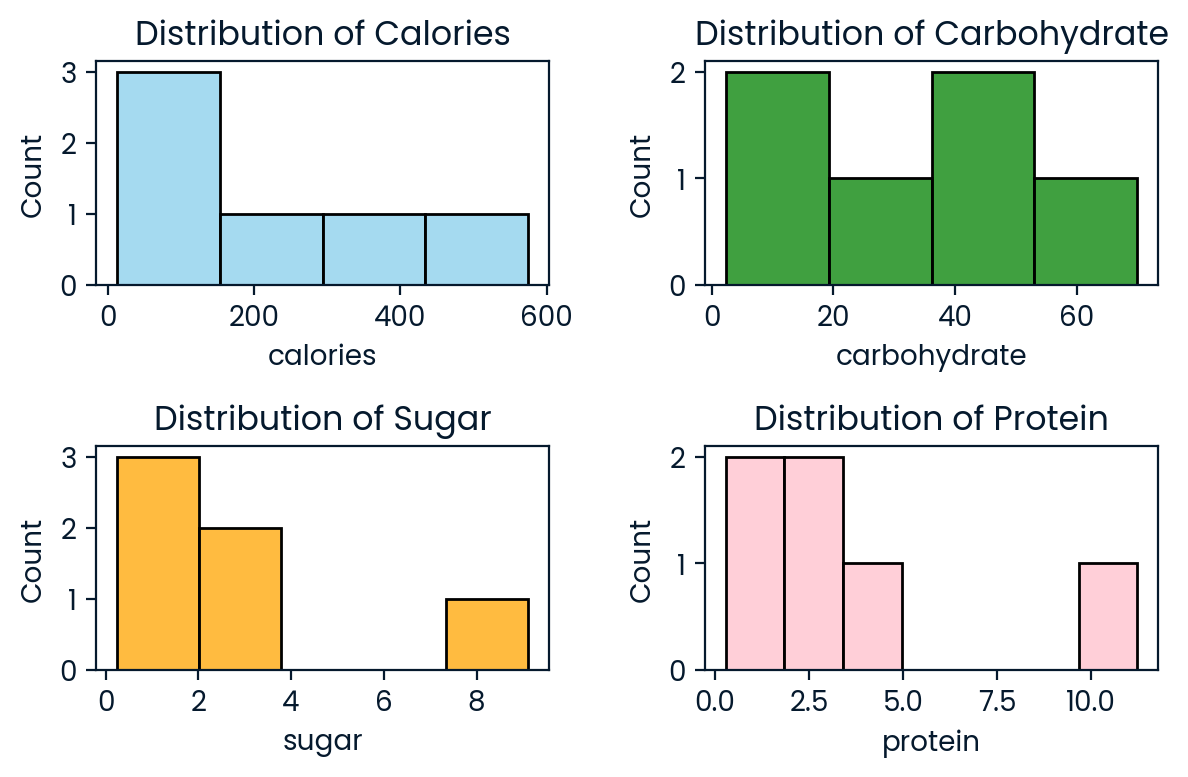

In [101]:
plot_distribution("Vegetable", 1)

In [102]:
# Call the function for Vegetable with 1 servings
fill_missing_values("Vegetable", 1)

# Check if the NaN values are filled for Vegetable
df[(df["category"] == "Vegetable") & (df["servings"] == 1)].isna().sum()

Vegetable 1 Serves Calories Median: 164.3
Vegetable 1 Serves Carbohydrate Median: 29.4
Vegetable 1 Serves Sugar Median: 1.8
Vegetable 1 Serves Protein Median: 2.76


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Servings Chicken

In [103]:
df[(servings_1) & (df["category"] == "Chicken")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
63,64,813.08,88.55,0.47,136.89,Chicken,1,True
147,148,1568.00,15.49,5.23,53.23,Chicken,1,False
229,230,393.73,39.26,1.33,17.38,Chicken,1,False
358,359,231.20,15.18,6.96,70.75,Chicken,1,True
382,383,275.96,29.94,13.22,7.49,Chicken,1,True
393,394,46.66,4.70,13.11,35.28,Chicken,1,False
439,440,114.08,15.13,1.81,38.60,Chicken,1,True
480,481,394.55,50.96,2.45,66.40,Chicken,1,False
484,485,225.87,6.19,2.97,2.89,Chicken,1,False
569,570,531.11,3.21,0.84,56.19,Chicken,1,True


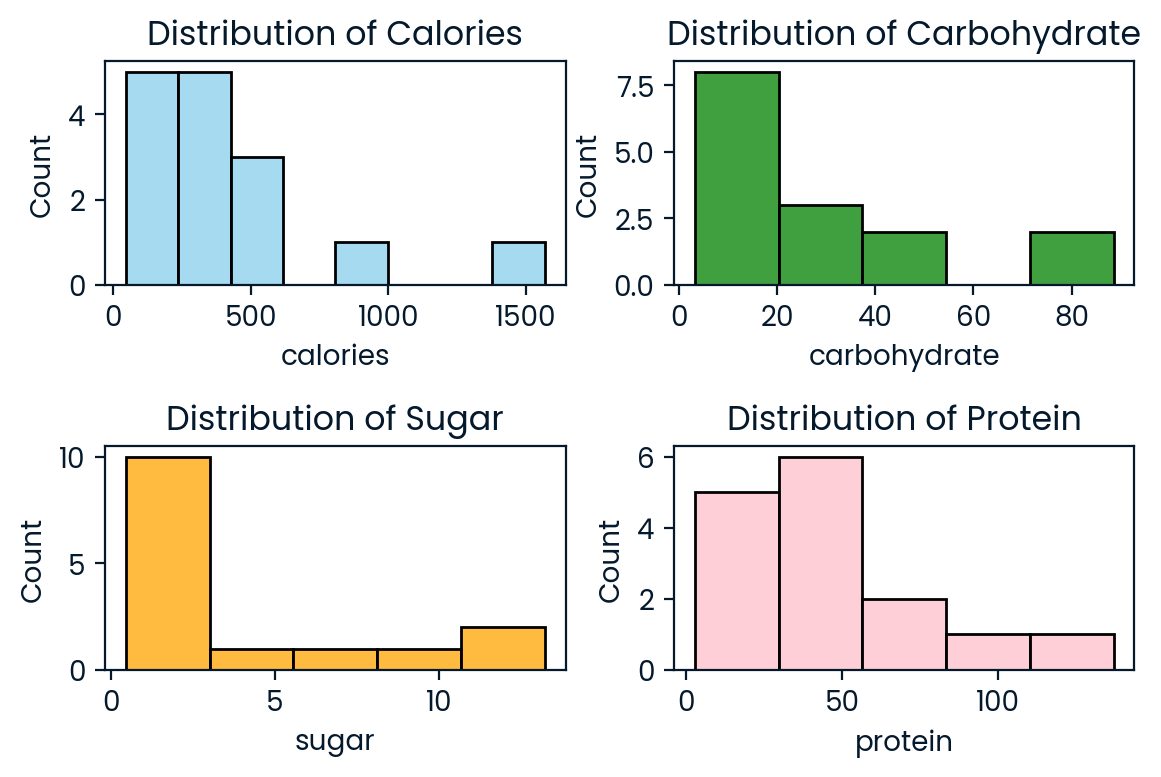

In [104]:
plot_distribution("Chicken", 1)

In [105]:
# Call the function for Chicken with 1 servings
fill_missing_values("Chicken", 1)

# Check if the NaN values are filled for Chicken
df[(df["category"] == "Chicken") & (df["servings"] == 1)].isna().sum()

Chicken 1 Serves Calories Median: 309.67
Chicken 1 Serves Carbohydrate Median: 15.49
Chicken 1 Serves Sugar Median: 1.81
Chicken 1 Serves Protein Median: 39.11


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Servings Potato

In [106]:
df[(servings_1) & (df["category"] == "Potato")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
210,211,1165.14,0.14,4.36,9.64,Potato,1,True
265,266,626.61,10.72,4.47,5.90,Potato,1,True
304,305,179.45,15.19,2.23,2.53,Potato,1,True
349,350,94.27,383.06,5.98,39.61,Potato,1,True
508,509,135.85,23.89,12.38,14.89,Potato,1,True
532,533,534.70,0.99,0.32,3.17,Potato,1,True
601,602,565.23,91.95,13.44,3.21,Potato,1,False
610,611,192.80,78.29,0.41,1.62,Potato,1,True
683,684,NaN,NaN,NaN,NaN,Potato,1,True
758,759,253.63,12.99,5.75,9.50,Potato,1,False


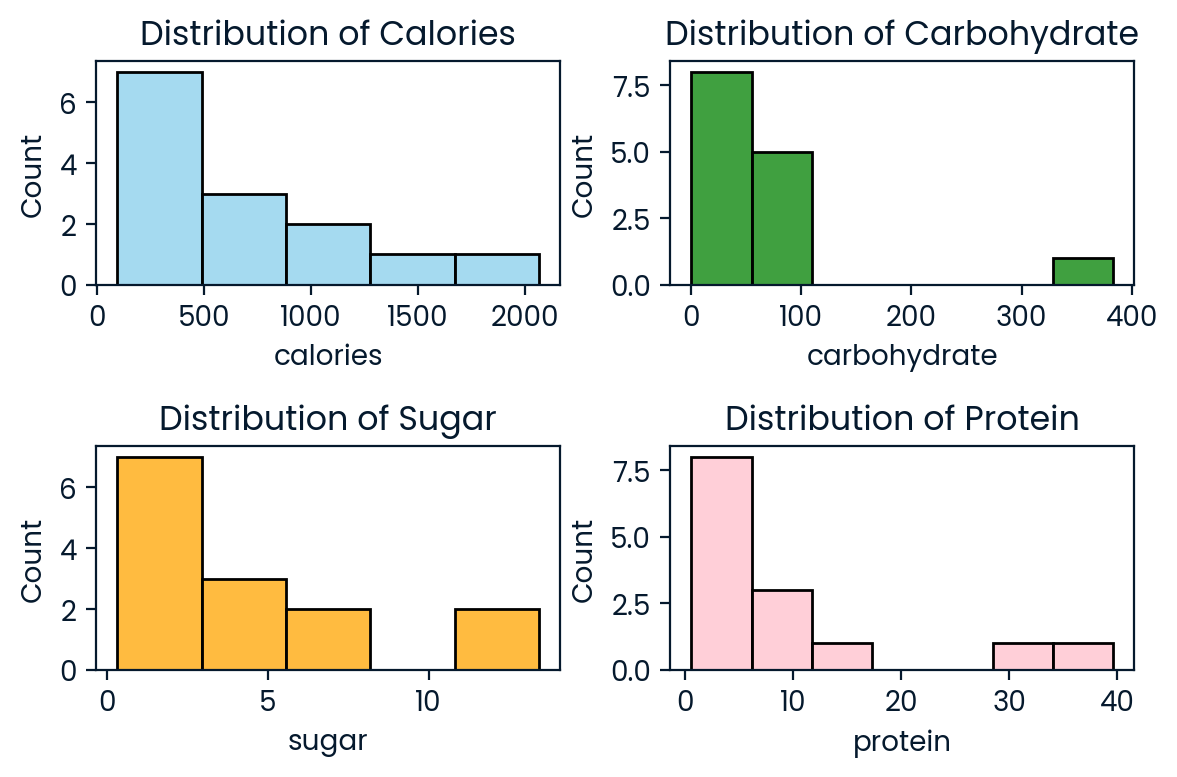

In [107]:
plot_distribution("Potato", 1)

In [108]:
# Call the function for Potato with 1 servings
fill_missing_values("Potato", 1)

# Check if the NaN values are filled for Potato
df[(df["category"] == "Potato") & (df["servings"] == 1)].isna().sum()

Potato 1 Serves Calories Median: 394.16
Potato 1 Serves Carbohydrate Median: 37.3
Potato 1 Serves Sugar Median: 3.3
Potato 1 Serves Protein Median: 5.22


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### 1 Servings Pork

In [109]:
df[(servings_1) & (df["category"] == "Pork")]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
55,56,2122.24,25.99,0.52,81.37,Pork,1,True
268,269,416.01,1.84,17.99,1.41,Pork,1,True
299,300,1277.97,4.15,0.29,7.64,Pork,1,True
345,346,187.46,47.62,16.30,78.81,Pork,1,True
473,474,67.72,11.03,5.32,40.39,Pork,1,True
566,567,1635.46,35.00,9.39,42.13,Pork,1,False
763,764,255.77,111.08,14.46,2.17,Pork,1,True
765,766,NaN,NaN,NaN,NaN,Pork,1,True
782,783,44.15,18.62,1.65,182.63,Pork,1,True
821,822,439.11,38.45,2.72,15.70,Pork,1,True


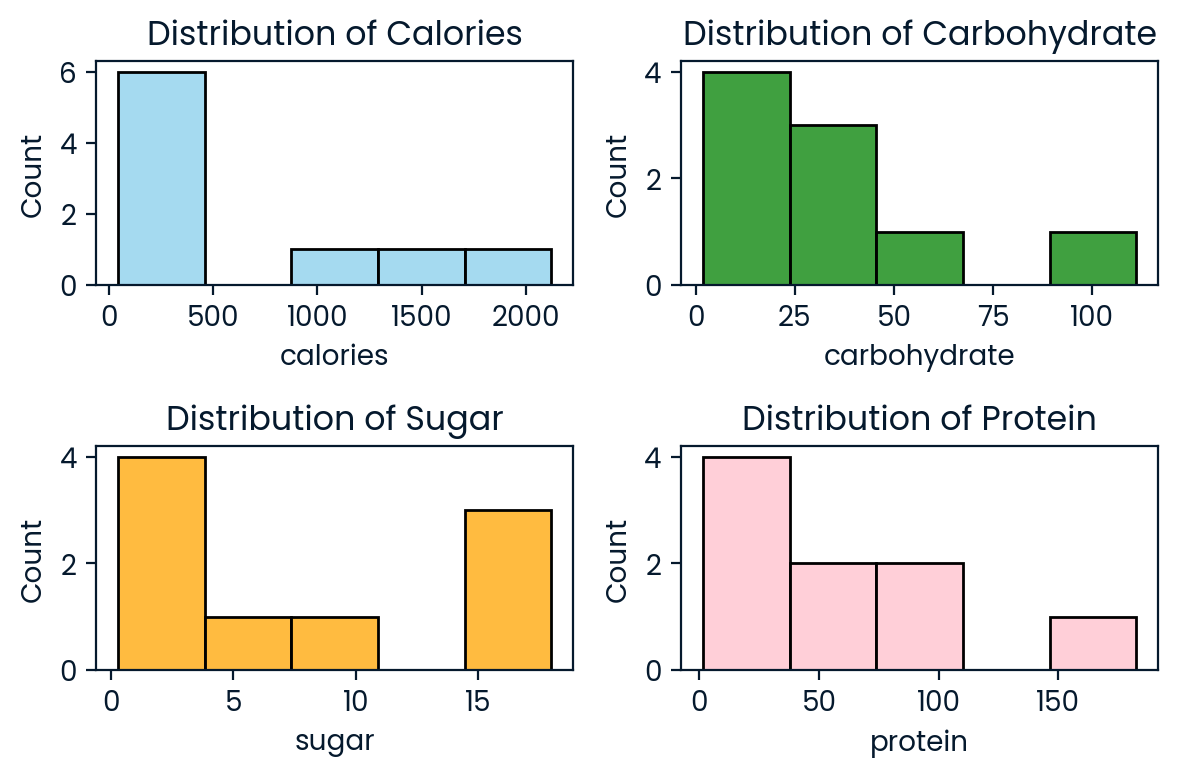

In [110]:
plot_distribution("Pork", 1)

In [111]:
# Call the function for Pork with 1 servings
fill_missing_values("Pork", 1)

# Check if the NaN values are filled for Pork
df[(df["category"] == "Pork") & (df["servings"] == 1)].isna().sum()

Pork 1 Serves Calories Median: 416.01
Pork 1 Serves Carbohydrate Median: 25.99
Pork 1 Serves Sugar Median: 5.32
Pork 1 Serves Protein Median: 40.39


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

### Checking the Null Values

In [112]:
# Rechecking the null value
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

# 2. Exploratory Data Analysis

In [113]:
high_traffic_df = df[df["high_traffic"] == True]
high_traffic_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,538.52,11.83,2.53,35.12,Pork,6,True
1,2,35.48,38.56,0.66,0.92,Potato,4,True
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
8,9,538.52,3.78,3.37,3.79,Pork,6,True


In [114]:
# Group the data by 'category' and count the occurrences
high_category_counts = high_traffic_df['category'].value_counts().reset_index()
high_category_counts.columns = ['category', 'count']

# Create a bar plot with the correct counts and custom colors
fig = px.bar(high_category_counts, y='category', x='count', color='category', 
             title="Number of High-Traffic Recipe per Category", 
             orientation='h')

fig.update_layout(    
    width=1200,  # Set the width of the figure in pixels
    height=600 )  # Set the height of the figure in pixels
    
# Show the plot
fig.show()

In [115]:
# Calculate high and low traffic proportions for each category
traffic_proportions = []

# Get unique categories
categories = df["category"].unique()

for cat in categories:
    # Count high and low traffic for the given category
    high_traffic_count = df[(df["category"] == cat) & (df["high_traffic"] == True)].shape[0]
    low_traffic_count = df[(df["category"] == cat) & (df["high_traffic"] == False)].shape[0]
    total = high_traffic_count + low_traffic_count

    if total > 0:
        high_proportion = round((high_traffic_count / total) * 100, 2)
        low_proportion = round((low_traffic_count / total) * 100, 2)
    else:
        high_proportion = 0
        low_proportion = 0

    # Append proportions to the list
    traffic_proportions.append([cat, high_proportion, low_proportion])

# Create a DataFrame for plotting
traffic_proportions_df = pd.DataFrame(traffic_proportions, columns=['Category', 'High Traffic Proportion (%)', 'Low Traffic Proportion (%)'])

# Sort the DataFrame by high traffic proportion
traffic_proportions_df = traffic_proportions_df.sort_values(by="High Traffic Proportion (%)", ascending=False)

traffic_proportions_df

,Category,High Traffic Proportion (%),Low Traffic Proportion (%)
8,Vegetable,98.80,1.20
1,Potato,94.32,5.68
0,Pork,91.67,8.33
9,Meat,74.68,25.32
4,One Dish Meal,73.24,26.76
6,Lunch/Snacks,64.04,35.96
10,Dessert,63.86,36.14
5,Chicken Breast,46.94,53.06
7,Chicken,36.49,63.51
2,Breakfast,31.13,68.87


In [116]:
# Create a Plotly figure for the stacked bar chart
fig = go.Figure()

# Add the high traffic proportion bars
fig.add_trace(go.Bar(
    x=traffic_proportions_df['Category'],
    y=traffic_proportions_df['High Traffic Proportion (%)'],
    name='High Traffic Proportion (%)',
    marker_color='skyblue',
    marker_line_color='black',  # Border color
    marker_line_width=1       # Border width
))

# Add the low traffic proportion bars
fig.add_trace(go.Bar(
    x=traffic_proportions_df['Category'],
    y=traffic_proportions_df['Low Traffic Proportion (%)'],
    name='Low Traffic Proportion (%)',
    marker_color='lightcoral',
    marker_line_color='black',  # Border color
    marker_line_width=1       # Border width
))

# Update layout to create a stacked bar chart
fig.update_layout(
    barmode='stack',  # Stack the bars
    title='Proportion of High and Low Traffic Recipe per Category',
    xaxis_title='Category',
    yaxis_title='Proportion (%)',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    legend=dict(
        title='Traffic Type',
        x=1.02,  # Position the legend outside the plot
        y=1
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    margin=dict(l=70, r=70, t=80, b=80),  # Adjust margins for better spacing
    width=1200,  # Set the width of the figure in pixels
    height=600   # Set the height of the figure in pixels
)

# Show the plot
fig.show()

In [117]:
category_dummies = pd.get_dummies(df["category"], drop_first= True, prefix= None, prefix_sep="")
category_dummies

,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
942,0,0,0,0,1,0,0,0,0,0
943,0,0,0,0,0,0,0,0,1,0
944,0,0,0,0,0,0,0,1,0,0
945,0,0,0,0,0,0,0,0,1,0


In [118]:
# Add dummy variables to the dataframe
df = pd.concat([df, category_dummies], axis = 1)

# Remove the category column from the dataframe
df = df.drop("category", axis = 1)

# Move 'high_traffic' column to the front of the DataFrame
column_to_move = 'high_traffic'
columns = [col for col in df.columns if col != column_to_move] + [column_to_move] 

# Reorder columns
df = df[columns]

df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable,high_traffic
0,1,538.52,11.83,2.53,35.12,6,0,0,0,0,0,0,0,1,0,0,True
1,2,35.48,38.56,0.66,0.92,4,0,0,0,0,0,0,0,0,1,0,True
2,3,914.28,42.68,3.09,2.88,1,1,0,0,0,0,0,0,0,0,0,False
3,4,97.03,30.56,38.63,0.02,4,0,0,0,0,0,0,0,0,0,0,True
4,5,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0,0,False


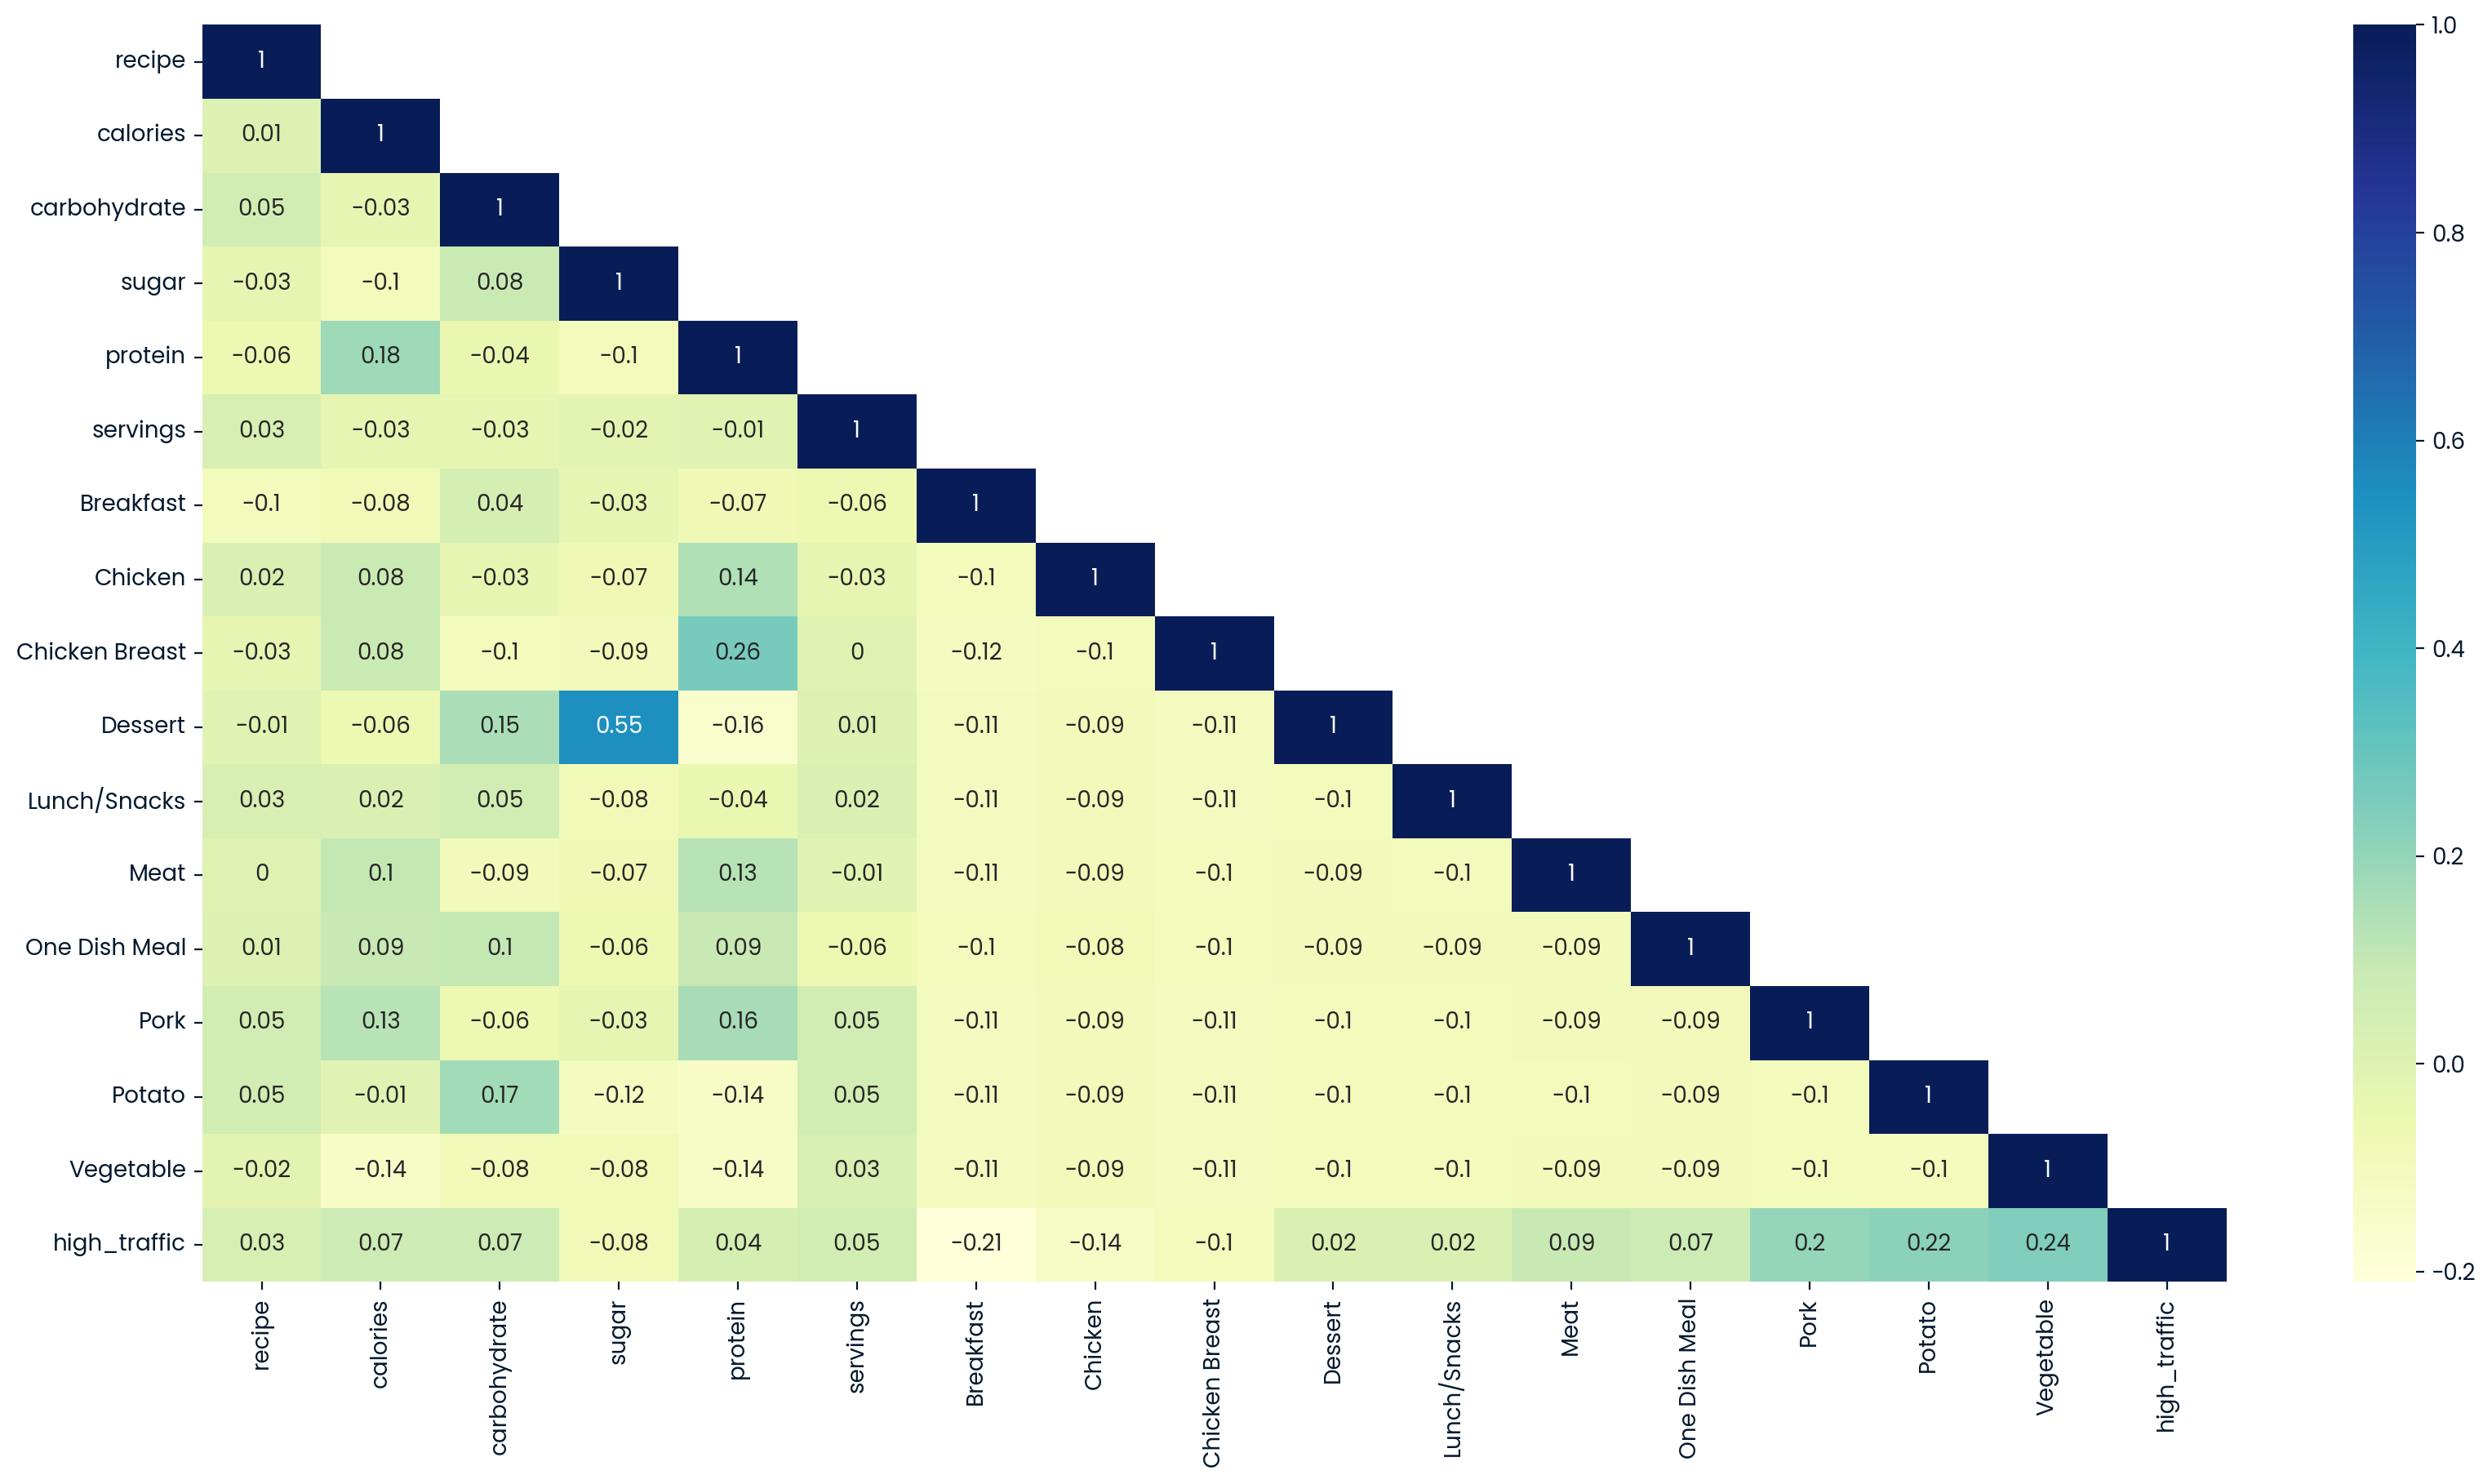

In [119]:
corr = df.corr().round(2)

mask = np.triu(np.ones_like(corr, dtype= bool), k= 1)

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap="YlGnBu", mask= mask)
plt.show()

# 3. Model Development

## 3.1 Define Features and Target Variable

In [120]:
X = df.drop("high_traffic", axis= 1)

X.head()

,recipe,calories,carbohydrate,sugar,protein,servings,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,1,538.52,11.83,2.53,35.12,6,0,0,0,0,0,0,0,1,0,0
1,2,35.48,38.56,0.66,0.92,4,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,1,0,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,0,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0,0


In [121]:
y = df["high_traffic"]

y.head()

0     True
1     True
2    False
3     True
4    False
Name: high_traffic, dtype: bool

## 3.2 Scaling the data

In [122]:
# Set up the scaler
scaler = StandardScaler()

# Scaling the data
X_scaled = scaler.fit_transform(X)

X_scaled[:3]

array([[-1.73022279,  0.2416342 , -0.52757015, -0.44292943,  0.31491651,
         1.45667266, -0.35502173, -0.2911446 , -0.33974979, -0.30994324,
        -0.32207081, -0.30168498, -0.28469322,  3.20527838, -0.32006984,
        -0.30994324],
       [-1.72656481, -0.89786478,  0.09580469, -0.57288435, -0.64929717,
         0.30182209, -0.35502173, -0.2911446 , -0.33974979, -0.30994324,
        -0.32207081, -0.30168498, -0.28469322, -0.31198538,  3.12431811,
        -0.30994324],
       [-1.72290683,  1.09281529,  0.19188791, -0.40401245, -0.59403814,
        -1.43045377,  2.816729  , -0.2911446 , -0.33974979, -0.30994324,
        -0.32207081, -0.30168498, -0.28469322, -0.31198538, -0.32006984,
        -0.30994324]])

## 3.3 Split the data into training and test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=100, stratify= y)

In [124]:
X_train[:3]

array([[-0.56332835, -0.05168984,  0.86586968, -0.22054668,  2.86754537,
        -0.85302848, -0.35502173, -0.2911446 ,  2.94334254, -0.30994324,
        -0.32207081, -0.30168498, -0.28469322, -0.31198538, -0.32006984,
        -0.30994324],
       [-0.41335132,  0.94756904, -0.74375738, -0.51311899, -0.41275469,
         1.45667266, -0.35502173, -0.2911446 , -0.33974979, -0.30994324,
         3.10490732, -0.30168498, -0.28469322, -0.31198538, -0.32006984,
        -0.30994324],
       [ 0.54869644, -0.44223734, -0.57794387, -0.56246016, -0.41952111,
         1.45667266, -0.35502173, -0.2911446 , -0.33974979, -0.30994324,
        -0.32207081, -0.30168498, -0.28469322, -0.31198538,  3.12431811,
        -0.30994324]])

In [125]:
y_train[:3]

319    True
360    True
623    True
Name: high_traffic, dtype: bool

## 3.4 Set up K-Fold to perform a cross-validation

In [126]:
# Set up K-Fold for performing cross validation
kf = KFold(n_splits= 10, shuffle= True, random_state= 100)

## 3.5 Set up 3 machine learning model for comparing which one has the best performance for this dataset

In [127]:
# Model 1 : Logistic Regression

# Set up the Logistic Regression
logreg = LogisticRegression()

# Indicate the searching area for tuning the model
param_grid = {
    'C': np.arange(0.001, 100, 0.01),
    'penalty': ['l1', 'l2'],  # Use 'saga' solver to support L1
    'solver': ['liblinear', 'saga'],  # Solver compatible with 'l1' penalty
    'max_iter': np.arange(100, 1000, 100)
}

# Set up RandomizedSearchCV for tuning the model
logreg_search = RandomizedSearchCV(
                                    estimator = logreg,
                                    param_distributions = param_grid,
                                    cv = kf,
                                    verbose = 1,
                                    random_state = 100,
                                    n_iter = 1000
)

# Tuning the model 
logreg_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {logreg_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {logreg_search.best_score_:.2f}")

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 700, 'C': 0.21099999999999997}
Best Cross-Validation Accuracy: 0.75


In [128]:
# Get best model
best_model_1 = logreg_search.best_estimator_
best_model_1

LogisticRegression(C=0.21099999999999997, max_iter=700, solver='liblinear')

In [129]:
# Model 2 : Random Forest Classifier

# Set up the Random Forest Classifier
rfc = RandomForestClassifier()

# Indicate the searching area for tuning the model
params = {
    "n_estimators" : np.arange(50, 1000, 50),
    "max_depth" : np.arange(10, 150, 10),
    "min_samples_split" : np.arange(0.1, 1, 0.05),
    "min_samples_leaf" : [1, 2, 3, 4, 5],
    "max_features" : ["sqrt", "log2"],
    "bootstrap" : [True, False]
}

# Set up RandomizedSearchCV for tuning the model
random_search = RandomizedSearchCV(
                                    estimator= rfc,
                                    param_distributions= params,
                                    cv = kf,
                                    verbose= 1,
                                    random_state= 100,
                                    n_iter= 1000
)

# Tuning the model
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Best Parameters: {'n_estimators': 600, 'min_samples_split': 0.1, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.74


In [130]:
# Get best model
best_model_2 = random_search.best_estimator_
best_model_2

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=0.1,
                       n_estimators=600)

In [131]:
# Model 3 : K-Nearest Neighbors

# Set up the K-Neareast Neighbor
knn = KNeighborsClassifier()

# Indicate the searching area for tuning the model
knn_params = {"n_neighbors" : np.arange(1, 100, 5)}

# Set up RandomizedSearchCV for tuning the model
grid_cv = RandomizedSearchCV(
                            estimator = knn,
                            param_distributions = knn_params,
                            verbose = 1,
                            cv = kf,
                            random_state = 100,
                            n_iter= 1000
)

# Tuning the model
grid_cv.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_cv.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_cv.best_score_:.2f}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'n_neighbors': 26}
Best Cross-Validation Accuracy: 0.76


In [132]:
# Get best model
best_model_3 = grid_cv.best_estimator_
best_model_3

KNeighborsClassifier(n_neighbors=26)

### Create a function getting the performance of the machine learning model

In [133]:
def print_classification_report(avg_classification_report, n_runs):
    # Create a DataFrame from the classification report dictionary for better formatting
    report_df = pd.DataFrame(avg_classification_report).transpose()

    # Round the values to 2 decimal places for a cleaner look
    report_df = report_df.round(2)

    # Print the classification report in a formatted style
    print(f"\nClassification Report (Averaged over {n_runs} runs):\n")
    print(report_df.to_string())
    print("")


def get_model_performance(X, y, tuned_model, n_runs=100, bootstrap=True):
    # Initialize variables to accumulate results
    confusion_matrices = []
    classification_reports = []
    recall_scores = []
    accuracy_scores = []

    for i in range(n_runs):
        # Optional: Bootstrap sampling (resample with replacement)
        if bootstrap:
            X_resampled, y_resampled = resample(X, y)
        else:
            X_resampled, y_resampled = X, y

        # Scaling the data
        scaler = StandardScaler()
        X_resampled_scaled = scaler.fit_transform(X_resampled)

        # Use a different random_state for each iteration
        random_seed = np.random.randint(0, 10000)  # Random seed for each split

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=random_seed)

        # Train the Tuned Model
        tuned_model.fit(X_train, y_train)
        y_pred_tuned = tuned_model.predict(X_test)

        # Store the confusion matrix and classification report for this run
        conf_matrix = confusion_matrix(y_test, y_pred_tuned)
        confusion_matrices.append(conf_matrix)

        # Classification report stored as a dictionary to facilitate averaging later
        class_report = classification_report(y_test, y_pred_tuned, output_dict=True)
        classification_reports.append(class_report)

        # Store recall and accuracy scores for this run
        recall_tuned = recall_score(y_test, y_pred_tuned)
        recall_scores.append(recall_tuned)

        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        accuracy_scores.append(accuracy_tuned)

    # Calculate the average confusion matrix
    average_confusion_matrix = np.round(np.mean(confusion_matrices, axis=0))

    # Calculate average classification report metrics
    avg_classification_report = {}
    for key in classification_reports[0].keys():
        # Check if the value is a dictionary (e.g., 'precision', 'recall', 'f1-score')
        if isinstance(classification_reports[0][key], dict):
            avg_classification_report[key] = {
                metric: np.mean([report[key][metric] for report in classification_reports])
                for metric in classification_reports[0][key].keys()
            }
        else:
            avg_classification_report[key] = np.mean([report[key] for report in classification_reports])

    # Convert recall and accuracy scores to arrays for easier calculation
    recall_scores = np.array(recall_scores)
    accuracy_scores = np.array(accuracy_scores)

    # Compute mean recall and accuracy scores
    mean_recall_score = np.mean(recall_scores)
    mean_accuracy_score = np.mean(accuracy_scores)

    # Print the results
    print("Average Confusion Matrix over multiple runs:")
    print(average_confusion_matrix)

    # Print the average classification report using the helper function
    print_classification_report(avg_classification_report, n_runs)

    print(f"Model Mean Recall: {mean_recall_score:.2f}")
    print(f"Model Mean Accuracy: {mean_accuracy_score:.2f}")

    # Return the computed averages
    return average_confusion_matrix, avg_classification_report, mean_accuracy_score, mean_recall_score


In [134]:
model1_average_confusion_matrix, model1_avg_classification_report, model1_avg_accuracy_score, model1_avg_recall_score = get_model_performance(X, y, best_model_1, n_runs=100, bootstrap=True)

Average Confusion Matrix over multiple runs:
[[ 75.  38.]
 [ 31. 141.]]

Classification Report (Averaged over 100 runs):

              precision  recall  f1-score  support
False              0.71    0.66      0.68   112.48
True               0.79    0.82      0.80   172.52
accuracy           0.76    0.76      0.76     0.76
macro avg          0.75    0.74      0.74   285.00
weighted avg       0.76    0.76      0.76   285.00

Model Mean Recall: 0.82
Model Mean Accuracy: 0.76


In [135]:
model2_average_confusion_matrix, model2_avg_classification_report, model2_avg_accuracy_score, model2_avg_recall_score = get_model_performance(X, y, best_model_2, n_runs=100, bootstrap=True)

Average Confusion Matrix over multiple runs:
[[ 73.  41.]
 [ 25. 146.]]

Classification Report (Averaged over 100 runs):

              precision  recall  f1-score  support
False              0.75    0.64      0.69   113.81
True               0.78    0.85      0.82   171.19
accuracy           0.77    0.77      0.77     0.77
macro avg          0.77    0.75      0.75   285.00
weighted avg       0.77    0.77      0.77   285.00

Model Mean Recall: 0.85
Model Mean Accuracy: 0.77


In [136]:
model3_average_confusion_matrix, model3_avg_classification_report, model3_avg_accuracy_score, model3_avg_recall_score = get_model_performance(X, y, best_model_3, n_runs=100, bootstrap=True)

Average Confusion Matrix over multiple runs:
[[ 75.  37.]
 [ 33. 140.]]

Classification Report (Averaged over 100 runs):

              precision  recall  f1-score  support
False              0.70    0.67      0.68   112.19
True               0.79    0.81      0.80   172.81
accuracy           0.75    0.75      0.75     0.75
macro avg          0.74    0.74      0.74   285.00
weighted avg       0.75    0.75      0.75   285.00

Model Mean Recall: 0.81
Model Mean Accuracy: 0.75


# 4. Model Evaluation

In [140]:
def compare_models(X, y, baseline_model, tuned_model, n_runs=100, bootstrap=True):
    # Initialize variables to accumulate results for both models
    recall_scores_baseline = []
    accuracy_scores_baseline = []
    confusion_matrices_baseline = []
    classification_reports_baseline = []

    recall_scores_tuned = []
    accuracy_scores_tuned = []
    confusion_matrices_tuned = []
    classification_reports_tuned = []

    for i in range(n_runs):
        # Optional: Bootstrap sampling (resample with replacement)
        if bootstrap:
            X_resampled, y_resampled = resample(X, y)
        else:
            X_resampled, y_resampled = X, y

        # Scaling the data
        scaler = StandardScaler()
        X_resampled_scaled = scaler.fit_transform(X_resampled)

        # Use a different random_state for each iteration
        random_seed = np.random.randint(0, 10000)  # Random seed for each split

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=random_seed)

        # Train Baseline Model
        baseline_model.fit(X_train, y_train)
        y_pred_baseline = baseline_model.predict(X_test)

        # Get the recall and accuracy score of the baseline model
        recall_baseline = recall_score(y_test, y_pred_baseline)
        accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

        # Add the recall and accuracy score of the baseline model to the list
        recall_scores_baseline.append(recall_baseline)
        accuracy_scores_baseline.append(accuracy_baseline)

        # Store confusion matrix and classification report for baseline model
        conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
        confusion_matrices_baseline.append(conf_matrix_baseline)

        class_report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)
        classification_reports_baseline.append(class_report_baseline)

        # Train Tuned Model
        tuned_model.fit(X_train, y_train)
        y_pred_tuned = tuned_model.predict(X_test)

        # Get the recall and accuracy score of the tuned model
        recall_tuned = recall_score(y_test, y_pred_tuned)
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

        # Add the recall and accuracy score of the tuned model to the list
        recall_scores_tuned.append(recall_tuned)
        accuracy_scores_tuned.append(accuracy_tuned)

        # Store confusion matrix and classification report for tuned model
        conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
        confusion_matrices_tuned.append(conf_matrix_tuned)

        class_report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)
        classification_reports_tuned.append(class_report_tuned)

    # Calculate mean recall and accuracy scores
    mean_recall_baseline = np.round(np.mean(recall_scores_baseline), 2)
    mean_recall_tuned = np.round(np.mean(recall_scores_tuned), 2)
    
    mean_accuracy_baseline = np.round(np.mean(accuracy_scores_baseline), 2)
    mean_accuracy_tuned = np.round(np.mean(accuracy_scores_tuned), 2)

    # Calculate average confusion matrices
    avg_confusion_matrix_baseline = np.round(np.mean(confusion_matrices_baseline, axis=0), 0)
    avg_confusion_matrix_tuned = np.round(np.mean(confusion_matrices_tuned, axis=0), 0)

    # Calculate average classification reports
    def calculate_avg_classification_report(classification_reports):
        avg_classification_report = {}
        for key in classification_reports[0].keys():
            if isinstance(classification_reports[0][key], dict):
                avg_classification_report[key] = {
                    metric: np.round(np.mean([report[key][metric] for report in classification_reports]), 2)
                    for metric in classification_reports[0][key].keys()
                }
            else:
                avg_classification_report[key] = np.round(np.mean([report[key] for report in classification_reports]), 2)
        return avg_classification_report

    avg_classification_report_baseline = calculate_avg_classification_report(classification_reports_baseline)
    avg_classification_report_tuned = calculate_avg_classification_report(classification_reports_tuned)

    # Perform one-tailed t-test (check if tuned model's recall is greater than baseline model's recall)
    t_stat, p_value = stats.ttest_rel(recall_scores_tuned, recall_scores_baseline)
    one_tailed_p_value = p_value / 2

    # Display the results
    print(f"\nBaseline Model Mean Recall: {mean_recall_baseline:.2f}")
    print(f"Tuned Model Mean Recall: {mean_recall_tuned:.2f}", "\n")
    print(f"Baseline Model Mean Accuracy: {mean_accuracy_baseline:.2f}")
    print(f"Tuned Model Mean Accuracy: {mean_accuracy_tuned:.2f}")

    print("\nAverage Confusion Matrix (Baseline Model):")
    print(avg_confusion_matrix_baseline)
    print("\nAverage Confusion Matrix (Tuned Model):")
    print(avg_confusion_matrix_tuned)

    print(f"\nAverage Classification Report (Baseline Model) over {n_runs} runs:")
    for label, metrics in avg_classification_report_baseline.items():
        print(f"{label}:")
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.2f}")
        else:
            print(f"  {metrics:.2f}")

    print(f"\nAverage Classification Report (Tuned Model) over {n_runs} runs:")
    for label, metrics in avg_classification_report_tuned.items():
        print(f"{label}:")
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.2f}")
        else:
            print(f"  {metrics:.2f}")

    print("\nT-statistic:", t_stat)
    print("P-value (one-tailed):", one_tailed_p_value)

    if t_stat > 0 and one_tailed_p_value < 0.10:
        print("Tuned model significantly outperforms the baseline model (one-tailed test).")
    else:
        print("No significant improvement in the tuned model over the baseline model (one-tailed test).")

    # Return the recall scores and average metrics for further analysis
    return {
        "recall_scores_baseline": recall_scores_baseline,
        "recall_scores_tuned": recall_scores_tuned,
        "avg_confusion_matrix_baseline": avg_confusion_matrix_baseline,
        "avg_confusion_matrix_tuned": avg_confusion_matrix_tuned,
        "avg_classification_report_baseline": avg_classification_report_baseline,
        "avg_classification_report_tuned": avg_classification_report_tuned,
        "mean_recall_baseline": mean_recall_baseline,
        "mean_recall_tuned": mean_recall_tuned,
        "mean_accuracy_baseline": mean_accuracy_baseline,
        "mean_accuracy_tuned": mean_accuracy_tuned,
    }

In [138]:
# Define the two models you want to compare
baseline_model = LogisticRegression()  # Baseline model (Logistic Regression)
tuned_model = best_model_2  # Model 2 (Tuned model)

In [290]:
# Call the compare_models function
result = compare_models(X, y, baseline_model, tuned_model, n_runs=1000, bootstrap=True)


Baseline Model Mean Recall: 0.82
Tuned Model Mean Recall: 0.86 

Baseline Model Mean Accuracy: 0.76
Tuned Model Mean Accuracy: 0.77

Average Confusion Matrix (Baseline Model):
[[ 74.  39.]
 [ 30. 142.]]

Average Confusion Matrix (Tuned Model):
[[ 72.  40.]
 [ 24. 148.]]

Average Classification Report (Baseline Model) over 1000 runs:
False:
  precision: 0.71
  recall: 0.66
  f1-score: 0.68
  support: 112.42
True:
  precision: 0.79
  recall: 0.82
  f1-score: 0.80
  support: 172.58
accuracy:
  0.76
macro avg:
  precision: 0.75
  recall: 0.74
  f1-score: 0.74
  support: 285.00
weighted avg:
  precision: 0.76
  recall: 0.76
  f1-score: 0.75
  support: 285.00

Average Classification Report (Tuned Model) over 1000 runs:
False:
  precision: 0.75
  recall: 0.64
  f1-score: 0.69
  support: 112.42
True:
  precision: 0.79
  recall: 0.86
  f1-score: 0.82
  support: 172.58
accuracy:
  0.77
macro avg:
  precision: 0.77
  recall: 0.75
  f1-score: 0.76
  support: 285.00
weighted avg:
  precision: 0.77

## 4. Business Metric

In [149]:
# Metric 1 : Proportion of High-Traffic Recipes
benchmark_proportion_high_traffic = df["high_traffic"].value_counts(normalize=True)[0]

print(f"Benchmark Proportion of High-Traffic Recipes : {benchmark_proportion_high_traffic:.2f}")

Benchmark Proportion of High-Traffic Recipes : 0.61


In [275]:
# Metric 2 : Nutritional Content Analysis of High-Traffic Recipes
high_traffic_nutritional_median = round(high_traffic_df[["calories", "carbohydrate", "sugar", "protein"]].median(), 2)

print("Median Nutritional Content of High-Traffic Recipes:")
high_traffic_nutritional_median

Median Nutritional Content of High-Traffic Recipes:


calories        309.58
carbohydrate     22.80
sugar             4.14
protein          12.47
dtype: float64

In [272]:
# Metric 3 : Category Contribution to High Traffic Recipes
category_high_traffic = round(high_traffic_df["category"].value_counts(normalize = True).reset_index(), 2)

category_high_traffic.columns = ["index", "Category Contribution to High Traffic (%)"]

category_contribution = pd.merge(category_high_traffic, 
                                 traffic_proportions_df, 
                                 left_on = "index", 
                                 right_on = "Category",
                                 how = "left")

category_contribution.drop("Category", axis = 1, inplace= True)

category_contribution.rename(columns = {"index" : "Category"}, inplace = True)

category_contribution

,Category,Category Contribution to High Traffic (%),High Traffic Proportion (%),Low Traffic Proportion (%)
0,Potato,0.14,94.32,5.68
1,Vegetable,0.14,98.80,1.20
2,Pork,0.13,91.67,8.33
3,Meat,0.10,74.68,25.32
4,Lunch/Snacks,0.10,64.04,35.96
5,Dessert,0.09,63.86,36.14
6,One Dish Meal,0.09,73.24,26.76
7,Chicken Breast,0.08,46.94,53.06
8,Breakfast,0.06,31.13,68.87
9,Chicken,0.05,36.49,63.51


In [301]:
# Metric 4 : Model Performance Metrics
print("Benchmark Model Accuracy :", result["mean_accuracy_tuned"])
print("Benchmark Model Recall :", result["mean_recall_tuned"])
print("Benchmark Model Precision :", result["avg_classification_report_tuned"]["True"]["precision"])

Benchmark Model Accuracy : 0.77
Benchmark Model Recall : 0.86
Benchmark Model Precision : 0.79
